<a href="https://colab.research.google.com/github/akshayaGanesan1997/Emotion-and-Sentiment-Analysis-of-Tweets/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXPLORING EMOTIONS ACROSS SENTIMENTS IN TWEETS**



## **Team Members**


1.   Akshaya Ganesan                  
402154350 - SUID
2.   Sandeep Narayan Prabhakar        
341706932 - SUID
3.   Sudhir Sidhaarthan Balamurugan   
998687349 - SUID
4.   Vishnu Vardhan Maheswaran        
550606905 - SUID

## **Content**
1. Dataset Extraction using ROBERTa transformer model
2. Dataset Checking
3. Data Pre-processing
4. Data Exploration
5. Feature Extraction
TF-IDF, Glove
6. Machine Learning Models
Naive Bayes, Logistic Regression, Decision Tree, Random Forest, SVM, XGBoost
7. Deep Learning Models
LSTM, CNN, GRU
8. Comparison of performance metrics of models
9. Data Analysis

## **Pre-Requisites**

1. Download the training.1600000.processed.noemoticon.csv dataset from kaggle, https://www.kaggle.com/datasets/utkarshx27/sentiment-analysis. This dataset is not required since the tweets_with_emotion csv file is provided which has emotion and sentiment tags.

2. Download and import the dataset, tweets_with_emotion csv which is provided along with the code submission. This dataset is tagged with emotion labels and sentiment labels. (Sufficient to perform data preprocessing, data analysis and model training)

3. Download the following glove embeddings glove.twitter.27B.zip. Unzip the folder and extract the glove.twitter.27B.100d.txt file. Upload this in drive in the following path
'/content/drive/MyDrive/Colab Notebooks/IST 664/Labs_Final/glove.twitter.27B.100d.txt'

## **Abstract**
This project delves into the intricate dynamics of human emotions
encapsulated within sentiments expressed in tweets. Utilizing a Kaggle dataset as the foundation, our exploration is propelled by the advanced RoBERTa model, a transformer-based architecture recognized for its adeptness in sentiment and emotion classification. The resultant dataset is a finely annotated compilation, providing a nuanced perspective on emotions intertwined with sentiments. Rigorous pre-processing techniques ensure data integrity, while feature extraction methods such as CountVectorizer, TF-IDF, and GloVe embeddings contribute to a comprehensive analysis.

Machine learning models, including Naive Bayes, Logistic Regression, Decision Tree, Random Forest, SVM, and XGBoost, are employed alongside deep learning models like Word2Vec with LSTM, GloVe with LSTM, Word2Vec with CNN, GloVe with CNN, Word2Vec with GRU, and GloVe with GRU. Comparative evaluations based on metrics such as Accuracy, Precision, Recall, and F1 score lead to insights on model performance. This research aims to contribute valuable insights into the intricate tapestry of sentiments and emotions within the digital discourse, offering a deeper understanding of human expression in the contemporary age of social media.




## **Installing Necessary Libraries**

These commands install essential libraries for machine learning (TensorFlow, Transformers, XGBoost). It's common to use TensorFlow and Transformers for machine learning tasks, including natural language processing, while XGBoost is a versatile library for gradient-boosted trees.

In [ ]:
pip install -U tensorflow==2.10

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 56.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2

In [ ]:
pip install --upgrade transformers tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 29.9 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.10.0
    Uninstalling tensorflow-estimator-2.10.0:
      Successfully uninstalled tensorflow-estimator-2.10.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.6.1
    Uninstalling tensorboard-data-server-0.6.1:
      Successfully uninstalled tensorboard-data-server-0.6.1
  

In [ ]:
pip install xgboost

##**Importing Necessary Libraries**

The provided code imports libraries for natural language processing (NLP) and machine learning tasks. It imports libraries for text processing and analysis, including regular expressions, string operations, and visualization tools. For NLP, it incorporates NLTK for language processing tasks, such as lemmatization, stopwords removal, and word cloud generation. In the machine learning domain, scikit-learn is employed for various tasks, featuring classifiers like Naive Bayes, Logistic Regression, Decision Trees, Random Forest, Support Vector Machines, and XGBoost.

Evaluation metrics such as accuracy, classification reports, and confusion matrices are utilized. Deep learning components are also included with PyTorch and TensorFlow, integrating tools for tokenization, embedding, and sequential model building. The code demonstrates integration with Google Colab, suggesting compatibility with the Colab environment for execution.

In [ ]:
import re
import string
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from google.colab import drive

import torch
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import GRU

from gensim.models import Word2Vec
from gensim.models import KeyedVectors

from transformers import BertTokenizer, TFBertModel

##**Loading the Dataset**

The dataset being used is the **Emoticon-Based Sentiment Prediction in Tweets**. This is comprised of 1048576 tweets obtained through the **Twitter API**, includes annotations designating sentiment polarity (**0 for negative, 2 for neutral, 4 for positive**). The dataset features six fields:

1. **sentiment**: Polarity of the tweet (0 for negative, 4 for positive).
2. **user_id**: Tweet ID (e.g., 2087).
3. **date**: Timestamp of the tweet (e.g., Sat May 16 23:58:44 UTC 2009).
4. **flag**: Associated query (e.g., lyx); NO_QUERY if no query is present.
5. **user**: Twitter user who posted the tweet (e.g., robotickilldozr).
6. **tweet**: The content of the tweet (e.g., "Lyx is cool").

Here, we are using only the **user** and **tweet** columns from the dataset.

In [ ]:
columns = ["sentiment", "user_id", "date", "flag", "user", "tweet"]
df = pd.read_csv('training.1600000.processed.noemoticon.csv',
            encoding = "ISO-8859-1",
            names=columns)

In [ ]:
df = df.sample(20000)
df.head()

sentiment     user_id                          date      flag  \
623587           0  2229605804  Thu Jun 18 15:57:19 PDT 2009  NO_QUERY   
1306345          4  2011653580  Tue Jun 02 19:21:23 PDT 2009  NO_QUERY   
1486709          4  2068136384  Sun Jun 07 13:33:41 PDT 2009  NO_QUERY   
1268457          4  2000039493  Mon Jun 01 21:17:27 PDT 2009  NO_QUERY   
1560409          4  2186339781  Mon Jun 15 18:41:57 PDT 2009  NO_QUERY   

                  user                                              tweet  
623587   Samantha_Star  @Zevia My local store only carries a couple of...  
1306345    lamchekyeow  Tempted to take a cab.. But bus just nice came...  
1486709   Patticanflyy             @dougiemcfly but ur hawt, so its okay   
1268457    phillipquin  Eyes heavy. All this staying up till midnight ...  
1560409   ashleyestill  Sitting 15 feet away from King James...I think...

In [ ]:
twitter_dataset = df.drop(["sentiment", "user_id", "date", "flag"], axis = 1)
twitter_dataset.head()

user                                              tweet
623587   Samantha_Star  @Zevia My local store only carries a couple of...
1306345    lamchekyeow  Tempted to take a cab.. But bus just nice came...
1486709   Patticanflyy             @dougiemcfly but ur hawt, so its okay 
1268457    phillipquin  Eyes heavy. All this staying up till midnight ...
1560409   ashleyestill  Sitting 15 feet away from King James...I think...

##**Sentiment Classification Using Transformers**

RoBERTa (Robustly optimized BERT approach) is a transformer-based model designed for natural language understanding tasks. For sentiment analysis, the model is pre-trained on large-scale datasets, learning contextualized representations of words. During inference, the model is fine-tuned on sentiment-labeled data to predict the sentiment of a given text. The sentiment label indicates the overall sentiment of the text (e.g., positive, negative, neutral), and the sentiment score reflects the model's confidence in its prediction. The RoBERTa transformer excels in capturing intricate patterns and contextual information in textual data, making it well-suited for sentiment analysis on social media content like Twitter tweets.

In [ ]:
model_path = "cardiffnlp/twitter-roberta-base-sentiment-latest"
s_classifier = pipeline("sentiment-analysis", model= model_path, tokenizer=model_path)

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [ ]:
s_classifier("uploading pictures from last night !	")

[{'label': 'neutral', 'score': 0.6411729454994202}]

The results are stored in a new column named 'sentiment_result,' which contains the raw output of the sentiment analysis, including the predicted sentiment label and score for each tweet. Subsequently, two additional columns, 'sentiment_label' and 'sentiment_score,' are created to extract and store the sentiment label and confidence score, respectively, from the 'sentiment_result' column. This enables a comprehensive analysis of the sentiment in the Twitter dataset, associating each tweet with its predicted sentiment label (e.g., positive, negative, neutral) and the model's confidence in that prediction.

In [ ]:
twitter_dataset['sentiment_result'] = twitter_dataset['tweet'].apply(lambda x: s_classifier(x))
twitter_dataset['sentiment_label'] = twitter_dataset['sentiment_result'].apply(lambda x: x[0]['label'])
twitter_dataset['sentiment_score'] = twitter_dataset['sentiment_result'].apply(lambda x: x[0]['score'])

In [ ]:
twitter_dataset_final = twitter_dataset.drop(["sentiment_result"], axis = 1)
twitter_dataset_final.head(20)

user                                              tweet  \
623587     Samantha_Star  @Zevia My local store only carries a couple of...   
1306345      lamchekyeow  Tempted to take a cab.. But bus just nice came...   
1486709     Patticanflyy             @dougiemcfly but ur hawt, so its okay    
1268457      phillipquin  Eyes heavy. All this staying up till midnight ...   
1560409     ashleyestill  Sitting 15 feet away from King James...I think...   
85867    divadivachrissy  Still up ! But gettin sleepy I still don't fee...   
767239       geekgirl444  @hambers To cut a long story short, I want one...   
901538           NadiaFN  @bill_archie Haha it's ok. Glad everything's g...   
195008    alexwilliamson  ordered pizza.... have to wait 45mins for it.....   
602451              Mol7  @LisaMcP Oh no that's awful, I thought you'd c...   
829173         byronrode  @acidicice fantasy? i are confused now. oh. mo...   
483462         Caronnnnn  @Rachel_Sneddon aw no is your phone broke as w...   
937227          mavissin  is attending a fabulous, enligtening, entertai...   
497159            cwire4                         Need to wash clothes blah    
1254986    BecomingBella  @LionEdward same here, thanks.  what are you d...   
444392       waxmerchant  Got off the toilet and started walking and alm...   
704345   FatBottomedGirl  - my feet are 3 times their normal size and pu...   
698797         Deanmcken                ipod, as usual. thinkin. erm bored    
51544      Goldbergblack  This puppy at work wants my attention so bad, ...   
1300972      BarelyBritt  @revii Thanks, I've always liked the name Eliz...   

        sentiment_label  sentiment_score  
623587         positive         0.726303  
1306345        positive         0.614975  
1486709        positive         0.728801  
1268457        negative         0.738941  
1560409         neutral         0.803307  
85867          positive         0.383672  
767239         negative         0.818712  
901538         positive         0.985170  
195008         negative         0.533447  
602451         negative         0.863257  
829173         negative         0.794071  
483462         negative         0.819922  
937227         positive         0.991879  
497159         negative         0.539636  
1254986        positive         0.651513  
444392         negative         0.800431  
704345         negative         0.528357  
698797          neutral         0.597927  
51544          negative         0.781104  
1300972        positive         0.958716

##**Emotion Classification Using Transformers**

This code utilizes the CardiffNLP RoBERTa-based transformer model for multi-label emotion classification on a Twitter dataset. The emotion classification pipeline (e_classifier) is created with the specified model, "cardiffnlp/twitter-roberta-base-emotion-multilabel-latest," allowing the model to predict multiple emotion labels for each tweet. The 'tweet' column from the 'twitter_dataset_final' is then processed using this emotion classifier, generating results containing predicted emotion labels and scores.

In [ ]:
e_classifier = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-emotion-multilabel-latest", top_k=1)

config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/409 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

In [ ]:
e_classifier("feeling a little lost.....also don't like the way I get spoken to by certain people, kinda unfair ")

[[{'label': 'sadness', 'score': 0.9399121403694153}]]

Two new columns, 'emotion_label' and 'emotion_score,' are added to the dataset to store the extracted emotion labels and corresponding confidence scores. The resulting 'twitter_dataset_final' provides insights into the predicted emotions for each tweet, encompassing multiple emotion labels and their associated confidence scores, facilitating a comprehensive understanding of emotional content within the Twitter dataset.

In [ ]:
results = e_classifier(twitter_dataset_final['tweet'].tolist())

emotion_labels = [result[0]['label'] for result in results]
emotion_scores = [result[0]['score'] for result in results]

twitter_dataset_final['emotion_label'] = emotion_labels
twitter_dataset_final['emotion_score'] = emotion_scores

In [ ]:
twitter_dataset_final.head(50)

user                                              tweet  \
623587     Samantha_Star  @Zevia My local store only carries a couple of...   
1306345      lamchekyeow  Tempted to take a cab.. But bus just nice came...   
1486709     Patticanflyy             @dougiemcfly but ur hawt, so its okay    
1268457      phillipquin  Eyes heavy. All this staying up till midnight ...   
1560409     ashleyestill  Sitting 15 feet away from King James...I think...   
85867    divadivachrissy  Still up ! But gettin sleepy I still don't fee...   
767239       geekgirl444  @hambers To cut a long story short, I want one...   
901538           NadiaFN  @bill_archie Haha it's ok. Glad everything's g...   
195008    alexwilliamson  ordered pizza.... have to wait 45mins for it.....   
602451              Mol7  @LisaMcP Oh no that's awful, I thought you'd c...   
829173         byronrode  @acidicice fantasy? i are confused now. oh. mo...   
483462         Caronnnnn  @Rachel_Sneddon aw no is your phone broke as w...   
937227          mavissin  is attending a fabulous, enligtening, entertai...   
497159            cwire4                         Need to wash clothes blah    
1254986    BecomingBella  @LionEdward same here, thanks.  what are you d...   
444392       waxmerchant  Got off the toilet and started walking and alm...   
704345   FatBottomedGirl  - my feet are 3 times their normal size and pu...   
698797         Deanmcken                ipod, as usual. thinkin. erm bored    
51544      Goldbergblack  This puppy at work wants my attention so bad, ...   
1300972      BarelyBritt  @revii Thanks, I've always liked the name Eliz...   
147978          fauxpunk                               UGH my throat hurts    
201328           gee_mon  so gonna have a major spn marathon today... to...   
785121             amor8  @mrsokie  I have a horror story of a Taurus.  ...   
216592       jennyweir13  Ok, more motivated now, got food, will eat the...   
1498602        ShawnKing  Cool! The Marines Motorcycle Safety Instructor...   
824873            iAslin           I'm feeling pretty! Going out with Tina    
171162      wizdomlakers  @OGVENOE I can't die  I have a lunch date with...   
804829      Heather1Lynn  Good morning! Its tuesday. Automatically bette...   
958255           wolfcat  @marcfennell saying you are not a stalker just...   
1051243           JLM_76              @RobFarva I'm jealous!! Must be nice    
710780      craziiloserr  maybe i shouldnt have ran like that! effect: t...   
907650         VolcomVan  @hotpants79 In two months i will have somethin...   
1519225        Jewels_09                    melbourne on thursday! syyyyke    
486442         DeadForGH  sorry for not posting so many updates   been b...   
1483787          ooohDay                                    baking cookies    
1132064    AlyssaVowells  @lilyroseallen Lily makes my life so fucking f...   
853399       effingcards  @missshelleycc You got facebook? http://tinyur...   
572649          keep1tup  is watching friend install OS 3.0 on his iphon...   
537674        PhanyPolar                     I just simply donÂ´'t get it!    
960917    larissasmart12                                 oh thats coooool.    
476160        HonkeyKong  Ghostbusters PC has online-activated DRM and n...   
557905         Joe_Parry  woke up to this weather  after yesterday. but ...   
153953     JessicaKate31                                    maths homework    
1478949      FluppyCrack  @willminey is it possible that everyone is com...   
1034680     redchinese19  Ya can talk, ya can talk, ya can bicker ya can...   
1032818         nglalala  @rayyypakk if you win... remember you owe me $...   
279697   allegrobeavette  @jessamineny I had a Live Aid t-shirt (that yo...   
238991        ldunnavant  @strawbrykiwi Hope it works out for you. Sorry...   
272935          siedahdj   @bowwow614 im up...only cuz i gotta go 2 school    
263612        brianshead  I do not particularly care for one-day weeke

This line of code saves the processed Twitter dataset (twitter_dataset_final) with the added sentiment and emotion information to a CSV file named 'tweets_with_emotion.csv'.

In [ ]:
twitter_dataset_final.to_csv('tweets_with_emotion.csv', index=False)

The **tweets_with_emotion csv** file is created by classifying sentiment and emotions in tweets in the **Emoticon-Based Sentiment Prediction in Tweets** dataset using ROBERTa pre-trained transformer models. This is the main dataset for performing further trainig on machine learning models and deep learning models. The code above this is just used for extracting the tweets_with_emotion csv dataset. This dataset is provided along with the code submission.

Import this **tweets_with_emotion** csv file and run the remaining code for performing data preprocessing, data analysis and model training.

##**Dataset Checking**

The dataset is loaded using Pandas, and a visual representation of the distribution of emotions across different sentiments is created using three subplots, each representing negative, neutral, and positive sentiments.

In [ ]:
sentiment_tweets = pd.read_csv('tweets_with_emotion.csv')

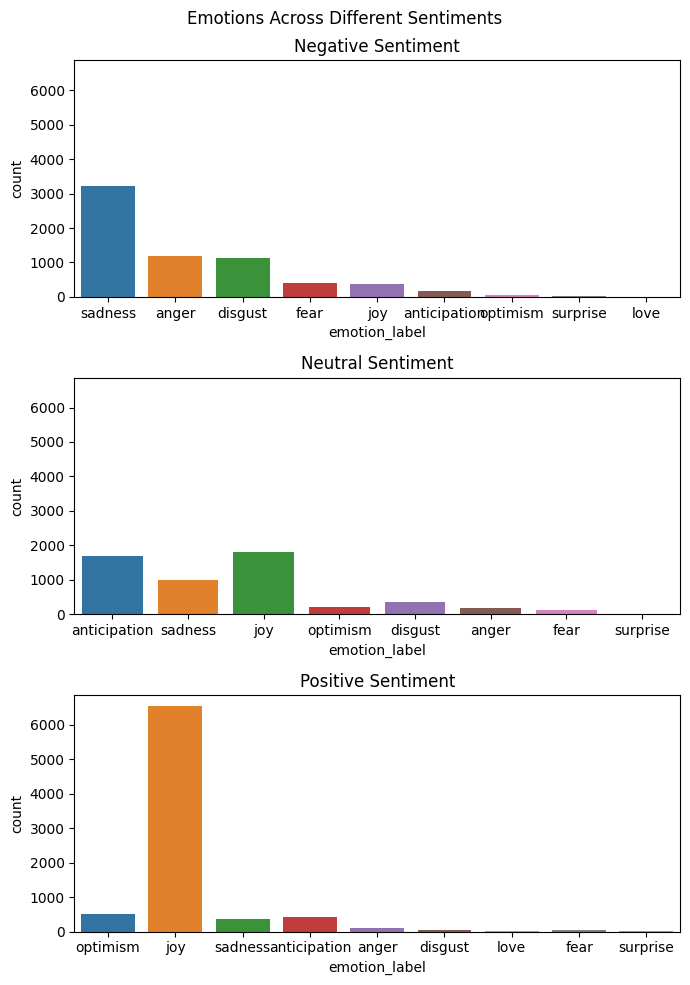

In [ ]:
fig, axes = plt.subplots(3,1, figsize = (7,10), sharey = True)
plt.suptitle('Emotions Across Different Sentiments')
sns.countplot(data=sentiment_tweets.loc[sentiment_tweets.sentiment_label == 'negative'], x= 'emotion_label', ax= axes[0])
axes[0]. title. set_text("Negative Sentiment")
sns.countplot(data=sentiment_tweets.loc[sentiment_tweets.sentiment_label == 'neutral'], x= 'emotion_label', ax= axes[1])
axes[1]. title. set_text("Neutral Sentiment")
sns.countplot(data=sentiment_tweets.loc[sentiment_tweets.sentiment_label == 'positive'], x= 'emotion_label', ax= axes[2])
axes[2]. title. set_text("Positive Sentiment")
plt.tight_layout()

These analyses provide insights into the dataset's characteristics, such as the distribution of sentiment and emotion labels, the presence of null values, data types of columns, and statistical summaries. Additionally, the code checks for duplicate rows in the dataset using the duplicated().sum() method.

Overall, this code serves as an initial exploratory data analysis (EDA) to understand the composition and quality of the sentiment and emotion annotated Twitter dataset.

In [ ]:
sentiment_tweets.head()

user                                              tweet  \
0  Samantha_Star  @Zevia My local store only carries a couple of...   
1    lamchekyeow  Tempted to take a cab.. But bus just nice came...   
2   Patticanflyy             @dougiemcfly but ur hawt, so its okay    
3    phillipquin  Eyes heavy. All this staying up till midnight ...   
4   ashleyestill  Sitting 15 feet away from King James...I think...   

  sentiment_label  sentiment_score emotion_label  emotion_score  
0        positive         0.726303      optimism       0.829181  
1        positive         0.614975      optimism       0.946256  
2        positive         0.728801           joy       0.950786  
3        negative         0.738941       sadness       0.505200  
4         neutral         0.803307  anticipation       0.809766

In [ ]:
sentiment_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user             20000 non-null  object 
 1   tweet            20000 non-null  object 
 2   sentiment_label  20000 non-null  object 
 3   sentiment_score  20000 non-null  float64
 4   emotion_label    20000 non-null  object 
 5   emotion_score    20000 non-null  float64
dtypes: float64(2), object(4)
memory usage: 937.6+ KB


In [ ]:
sentiment_tweets.isnull().sum()

user               0
tweet              0
sentiment_label    0
sentiment_score    0
emotion_label      0
emotion_score      0
dtype: int64

In [ ]:
sentiment_tweets.dtypes

user                object
tweet               object
sentiment_label     object
sentiment_score    float64
emotion_label       object
emotion_score      float64
dtype: object

The list of sentiments in our dataset are:

1. Positive
2. Negative
3. Neutral

In [ ]:
sentiment_tweets['sentiment_label'].value_counts()

positive    8072
negative    6578
neutral     5350
Name: sentiment_label, dtype: int64

The list of emotions in our dataset are:
1. Joy
2. Sadness
3. Anticipation
4. Disgust
5. Anger
6. Optimism
7. Fear
8. Surprise
9. Love

In [ ]:
sentiment_tweets['emotion_label'].value_counts()

joy             8706
sadness         4577
anticipation    2277
disgust         1552
anger           1466
optimism         785
fear             581
surprise          42
love              14
Name: emotion_label, dtype: int64

In [ ]:
sentiment_tweets.describe()

sentiment_score  emotion_score
count     20000.000000   20000.000000
mean          0.786014       0.841171
std           0.166279       0.191472
min           0.340022       0.120363
25%           0.653311       0.775352
50%           0.829417       0.929284
75%           0.930702       0.976358
max           0.993298       0.993205

In [ ]:
sentiment_tweets.duplicated().sum()

4

##**Data Preprocessing**

In [ ]:
#List of Emojis
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [ ]:
urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
userPattern       = '@[^\s]+'
alphaPattern      = "[^a-zA-Z0-9]"
sequencePattern   = r"(.)\1\1+"
seqReplacePattern = r"\1\1"

The provided code encompasses a series of data preprocessing steps tailored for enhancing the quality of text data within the 'tweet' column of the 'sentiment_tweets' dataframe. First, the text is converted to lowercase for uniformity. Subsequently, URLs are replaced with the identifier 'URL' to standardize their representation.

Emojis are substituted with corresponding textual representations, separating them with the identifier 'EMOJI' for clarity. Usernames, identified by the '@' symbol, are replaced with 'USER' to anonymize mentions. Non-alphabetic characters are removed, and consecutive identical letters are reduced to two letters to streamline the text. Stopwords, common English words devoid of substantial meaning, are eliminated to focus on more informative terms. Finally, lemmatization is applied to reduce words to their base forms.

In [ ]:
def preprocess_text(text):
    text = text.lower()

    # Replace URLs with 'URL'
    text = re.sub(urlPattern, 'URL', text, flags=re.MULTILINE)

    # Replace emojis with their meanings
    for emoji in emojis.keys():
        text = text.replace(emoji, "EMOJI" + emojis[emoji])

    # Replace @Usernames with 'USER'
    text = re.sub(userPattern, 'USER', text)

    # Remove non-alphabetic characters
    text = re.sub(alphaPattern, ' ', text)

    # Replace consecutive letters with two letters
    text = re.sub(sequencePattern, seqReplacePattern, text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word.lower() not in stop_words])

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

    return text

The resulting cleaned tweets are stored in a new column named 'clean_tweets' in the 'sentiment_tweets' dataframe, providing a refined version of the original text data for further analysis.

In [ ]:
# Apply preprocessing to the 'tweet' column in the dataframe
sentiment_tweets['clean_tweets'] = sentiment_tweets['tweet'].apply(preprocess_text)

# Display the updated dataframe
sentiment_tweets.head()

user                                              tweet  \
0  Samantha_Star  @Zevia My local store only carries a couple of...   
1    lamchekyeow  Tempted to take a cab.. But bus just nice came...   
2   Patticanflyy             @dougiemcfly but ur hawt, so its okay    
3    phillipquin  Eyes heavy. All this staying up till midnight ...   
4   ashleyestill  Sitting 15 feet away from King James...I think...   

  sentiment_label  sentiment_score emotion_label  emotion_score  \
0        positive         0.726303      optimism       0.829181   
1        positive         0.614975      optimism       0.946256   
2        positive         0.728801           joy       0.950786   
3        negative         0.738941       sadness       0.505200   
4         neutral         0.803307  anticipation       0.809766   

                                        clean_tweets  
0  USER local store carry couple flavor hopefully...  
1  tempted take cab bus nice came lol lot thing m...  
2                                  USER ur hawt okay  
3  eye heavy staying till midnight getting 6 30 c...  
4  sitting 15 foot away king james think diamond ...

##**Data Exploration**

The function 'top_words_per_sentiment' generates word clouds, visually presenting the most frequent words for each sentiment category (positive, negative, and neutral). This offers an intuitive understanding of the prevalent themes associated with different sentiments

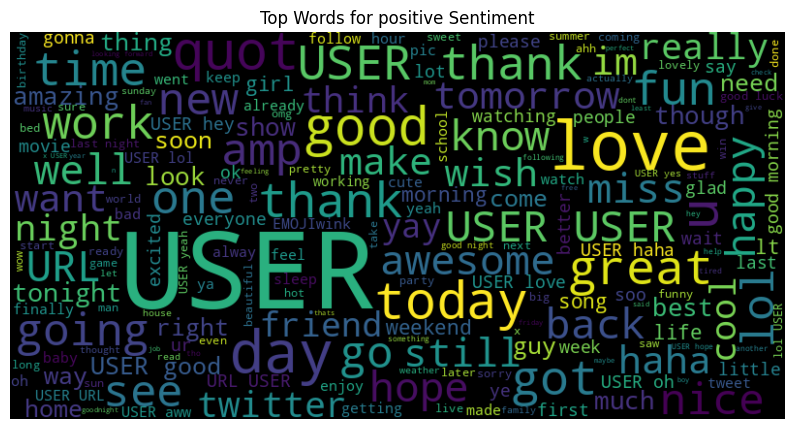

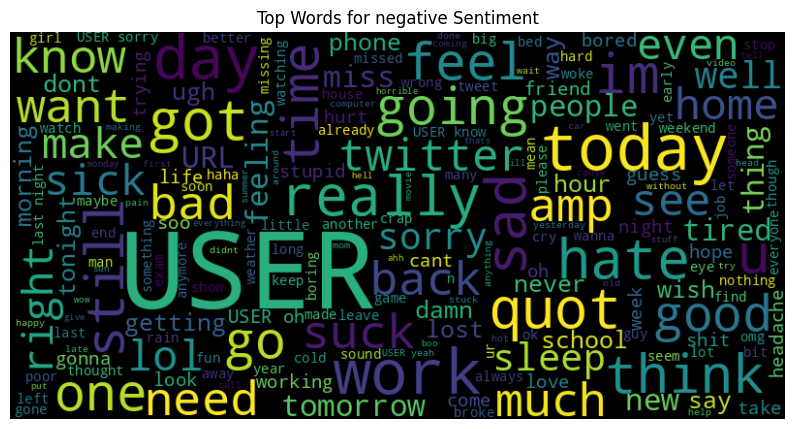

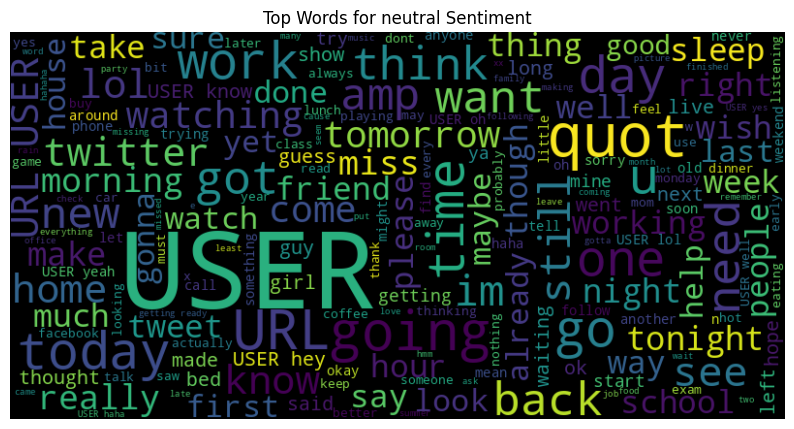

In [ ]:
def top_words_per_sentiment(sentiment_label, n=10):
    sentiment_tweets_subset = sentiment_tweets[sentiment_tweets['sentiment_label'] == sentiment_label]
    sentiment_text = ' '.join(sentiment_tweets_subset['clean_tweets'])
    wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(sentiment_text)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f'Top Words for {sentiment_label} Sentiment')
    plt.axis('off')
    plt.show()

# Example: Top words for positive sentiment
top_words_per_sentiment('positive')
top_words_per_sentiment('negative')
top_words_per_sentiment('neutral')

From the above word clouds we can infer that:

Top words for positive sentiment are:
1. Awesome
2. Well
3. Fun
4. Happy
5. Glad
6. Best

Top word for negative sentiment are:
1. Miss
2. Suck
3. Sick
4. Sad
5. Sorry
6. Bored

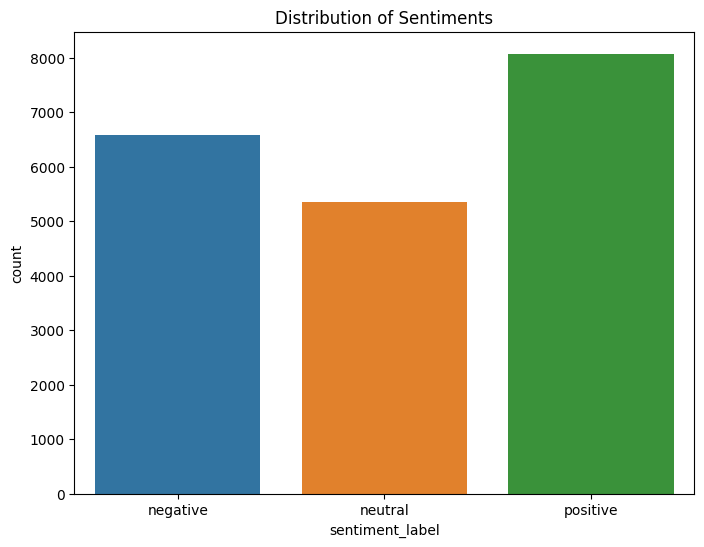

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=sentiment_tweets, order=['negative', 'neutral', 'positive'])
plt.title('Distribution of Sentiments')
plt.show()

This visual representation allows for the examination of the prevalence of specific emotions across various sentiments, providing a comprehensive perspective on the emotional content associated with different sentiment labels in the Twitter dataset.

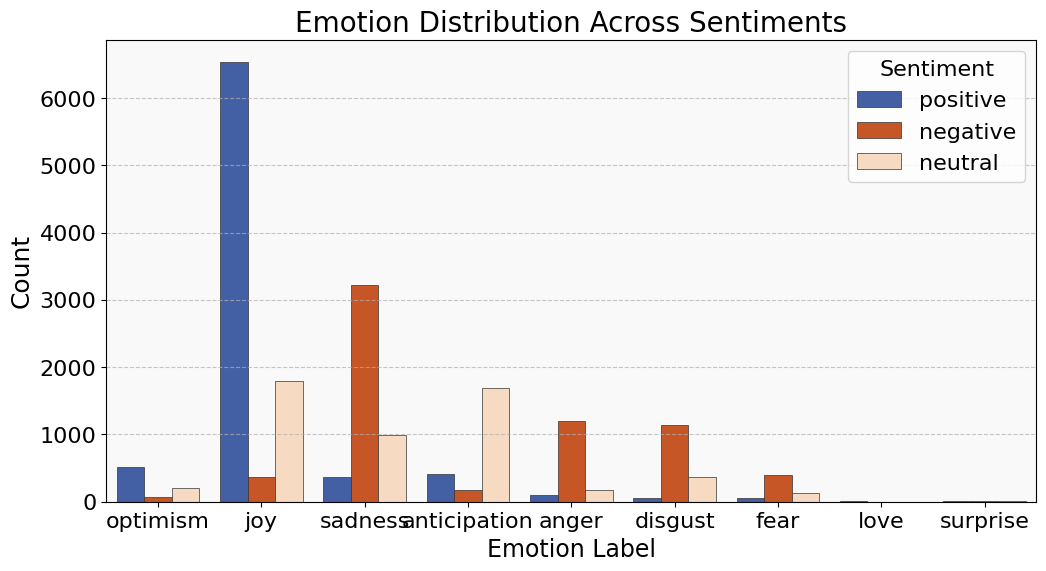

In [ ]:
# Set custom colors
custom_colors = ['#335ab4', '#e14b0a', '#ffdab9']

# Create a bar chart with enhanced styling
plt.figure(figsize=(12, 6))
sns.countplot(x='emotion_label', hue='sentiment_label', data=sentiment_tweets, palette=custom_colors, edgecolor='0.2', linewidth=0.5)
plt.title('Emotion Distribution Across Sentiments', fontsize=20)
plt.xlabel('Emotion Label', fontsize=17)
plt.ylabel('Count', fontsize=18)
plt.legend(title='Sentiment', title_fontsize='16', fontsize='16', loc='upper right')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add a background color for better contrast
plt.gca().set_facecolor('#f9f9f9')

plt.show()

The above graph shows that emotions like joy, optimism has more number of positive words while the emotions like sadness, anger and fear have more number of negative words. The count of neutral sentiment words are equal in all emotions.

##**Machine Learning Models**


In the provided code, the dataset is prepared for sentiment and emotion analysis by splitting it into training and testing sets for both tasks. The 'clean_tweets' column serves as the feature variable ('X'), and 'sentiment_label' and 'emotion_label' columns are used as target variables ('y_sentiment' and 'y_emotion' respectively). The dataset is split into training and testing sets for sentiment analysis (X_train_sentiment, X_test_sentiment, y_train_sentiment, y_test_sentiment) and emotion analysis (X_train_emotion, X_test_emotion, y_train_emotion, y_test_emotion) using the train_test_split function.

In [ ]:
# Assuming 'clean_tweets' is the cleaned text and 'sentiment_label' is the target variable
X = sentiment_tweets['clean_tweets']
y_sentiment = sentiment_tweets['sentiment_label']
y_emotion = sentiment_tweets['emotion_label']

# Splitting for sentiment analysis
X_train_sentiment, X_test_sentiment, y_train_sentiment, y_test_sentiment = train_test_split(
    X, y_sentiment, test_size=0.2, random_state=42
)

# Splitting for emotion analysis
X_train_emotion, X_test_emotion, y_train_emotion, y_test_emotion = train_test_split(
    X, y_emotion, test_size=0.2, random_state=42
)

Following the data preparation, a set of machine learning models is defined, including Naive Bayes, Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVM), and XGBoost. These models are chosen for their suitability in text classification tasks and varied strengths in handling different types of data distributions.

**Naive Bayes:**

Efficient for text classification, Naive Bayes leverages Bayes' theorem with the "naive" independence assumption, making it effective for high-dimensional data in both sentiment and emotion tasks.

**Logistic Regression:**

Versatile in binary and multiclass classification, Logistic Regression is well-suited for sentiment and emotion analysis, providing a probabilistic interpretation of class membership.

**Decision Tree:**

Selected for its interpretable tree-like structures, Decision Trees capture complex relationships in both sentiment and emotion analysis, offering insights into the decision-making process.

**Random Forest:**

Used to enhance robustness and generalization in sentiment and emotion analysis, Random Forest constructs multiple decision trees, collectively improving predictions.

**Support Vector Machine (SVM):**

Effective in high-dimensional spaces, SVM constructs a hyperplane for sentiment and emotion analysis, showcasing versatility across various data distributions.

**XGBoost:**

Known for speed and performance, XGBoost efficiently combines multiple decision trees, emphasizing accurate classification in both sentiment and emotion tasks.

In [ ]:
# Define machine learning models
models = [
    ('Naive Bayes', MultinomialNB()),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('XGBoost', XGBClassifier())
]

The models are then evaluated for sentiment and emotion analysis separately using the evaluate_model_with_report function, which computes accuracy, generates a classification report, and visualizes a confusion matrix for each model. Sentiment labels and emotion labels are encoded into numerical values using LabelEncoder for model training.

In [ ]:
# Function to evaluate models with classification report
def evaluate_model_with_report(name, model, X_train, y_train, X_test, y_test, labels, analysis_type):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy for {analysis_type}: {acc}")
    print(f"{name} Classification Report for {analysis_type}:\n")
    report = classification_report(y_test, y_pred, target_names=labels)
    print(report)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=[6, 4])
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
    plt.title(f'Confusion Matrix for {name} - {analysis_type}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print('\n--------------------------------------------------------------------')

In [ ]:
# Encode sentiment labels to numerical values
label_encoder_sentiment = LabelEncoder()
y_train_sentiment_encoded = label_encoder_sentiment.fit_transform(y_train_sentiment)
y_test_sentiment_encoded = label_encoder_sentiment.transform(y_test_sentiment)

# Encode emotion labels to numerical values
label_encoder_emotion = LabelEncoder()
y_train_emotion_encoded = label_encoder_emotion.fit_transform(y_train_emotion)
y_test_emotion_encoded = label_encoder_emotion.transform(y_test_emotion)

### **Baseline Feature Set (CountVectorizer)**



In the provided code, a **CountVectorizer** is employed for feature set extraction, specifically for sentiment and emotion analysis tasks. The CountVectorizer is configured with a maximum of 5000 features and a n-gram range of (1, 3), allowing it to consider unigrams, bigrams, and trigrams during the vectorization process.

For sentiment analysis, the feature set is generated separately for training and testing sets (X_train_baseline_sentiment and X_test_baseline_sentiment) by applying count vectorization to the 'clean_tweets' using the configured CountVectorizer. Similarly, for emotion analysis, the feature set is created for both training and testing sets (X_train_baseline_emotion and X_test_baseline_emotion).

These feature sets represent the baseline representation of the text data, where the occurrence frequency of words and word combinations within the specified n-gram range is captured. The code then proceeds to evaluate the defined machine learning models using these baseline feature sets for both sentiment and emotion analysis, providing insights into the models' performance on the given tasks. The CountVectorizer is chosen for its simplicity and effectiveness in converting text data into a numerical format suitable for training machine learning models, counting the occurrences of words and n-grams within the specified range.

Naive Bayes Accuracy for Sentiment (Baseline): 0.65075
Naive Bayes Classification Report for Sentiment (Baseline):

              precision    recall  f1-score   support

    negative       0.68      0.69      0.69      1291
     neutral       0.53      0.45      0.49      1071
    positive       0.69      0.75      0.72      1638

    accuracy                           0.65      4000
   macro avg       0.63      0.63      0.63      4000
weighted avg       0.64      0.65      0.65      4000



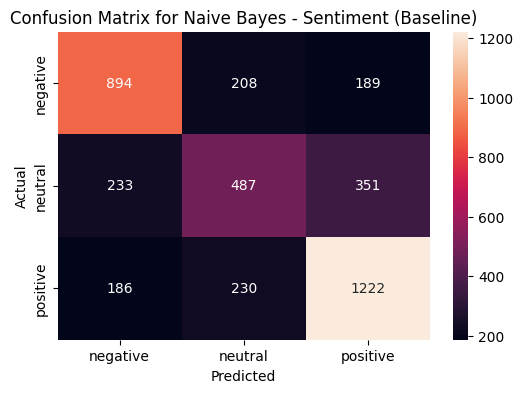


--------------------------------------------------------------------
Logistic Regression Accuracy for Sentiment (Baseline): 0.67925
Logistic Regression Classification Report for Sentiment (Baseline):

              precision    recall  f1-score   support

    negative       0.71      0.66      0.69      1291
     neutral       0.55      0.66      0.60      1071
    positive       0.76      0.71      0.74      1638

    accuracy                           0.68      4000
   macro avg       0.67      0.68      0.67      4000
weighted avg       0.69      0.68      0.68      4000



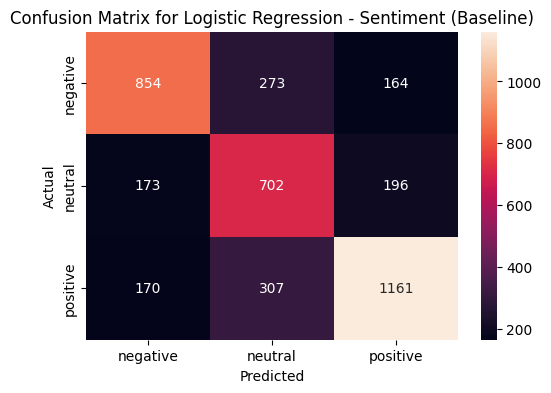


--------------------------------------------------------------------
Decision Tree Accuracy for Sentiment (Baseline): 0.59725
Decision Tree Classification Report for Sentiment (Baseline):

              precision    recall  f1-score   support

    negative       0.60      0.58      0.59      1291
     neutral       0.51      0.55      0.53      1071
    positive       0.66      0.64      0.65      1638

    accuracy                           0.60      4000
   macro avg       0.59      0.59      0.59      4000
weighted avg       0.60      0.60      0.60      4000



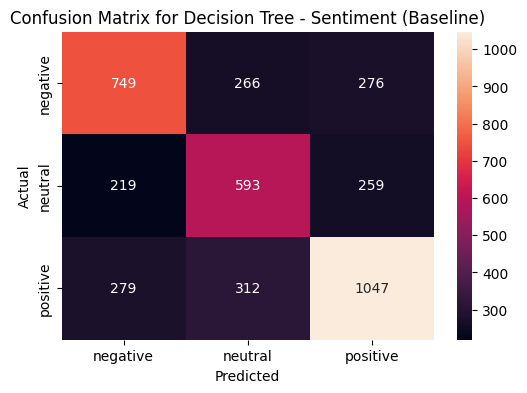


--------------------------------------------------------------------
Random Forest Accuracy for Sentiment (Baseline): 0.65525
Random Forest Classification Report for Sentiment (Baseline):

              precision    recall  f1-score   support

    negative       0.70      0.61      0.65      1291
     neutral       0.52      0.64      0.58      1071
    positive       0.73      0.70      0.72      1638

    accuracy                           0.66      4000
   macro avg       0.65      0.65      0.65      4000
weighted avg       0.67      0.66      0.66      4000



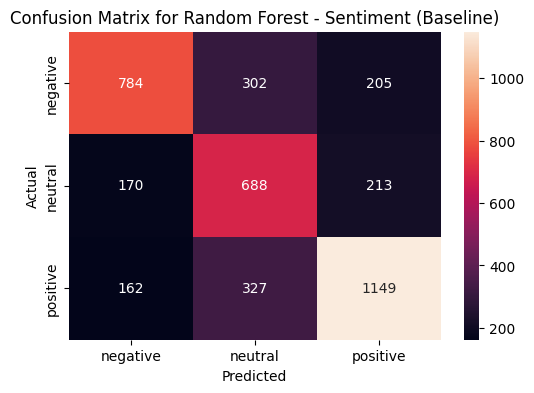


--------------------------------------------------------------------
SVM Accuracy for Sentiment (Baseline): 0.67725
SVM Classification Report for Sentiment (Baseline):

              precision    recall  f1-score   support

    negative       0.74      0.63      0.68      1291
     neutral       0.54      0.69      0.61      1071
    positive       0.75      0.71      0.73      1638

    accuracy                           0.68      4000
   macro avg       0.68      0.68      0.67      4000
weighted avg       0.69      0.68      0.68      4000



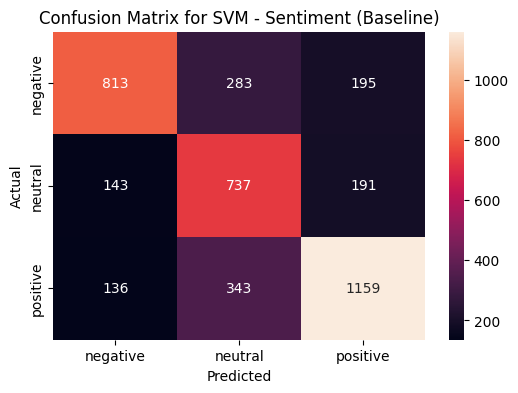


--------------------------------------------------------------------
XGBoost Accuracy for Sentiment (Baseline): 0.67975
XGBoost Classification Report for Sentiment (Baseline):

              precision    recall  f1-score   support

    negative       0.77      0.61      0.68      1291
     neutral       0.52      0.76      0.62      1071
    positive       0.79      0.68      0.73      1638

    accuracy                           0.68      4000
   macro avg       0.69      0.68      0.68      4000
weighted avg       0.71      0.68      0.68      4000



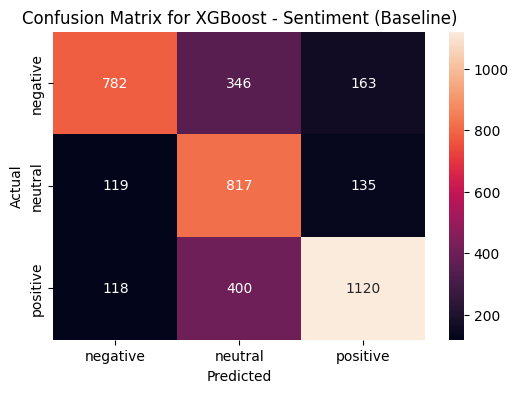


--------------------------------------------------------------------
Naive Bayes Accuracy for Emotion (Baseline): 0.594
Naive Bayes Classification Report for Emotion (Baseline):

              precision    recall  f1-score   support

       anger       0.58      0.27      0.37       325
anticipation       0.35      0.31      0.33       463
     disgust       0.26      0.12      0.16       290
        fear       0.46      0.11      0.18       106
         joy       0.66      0.85      0.74      1733
        love       0.00      0.00      0.00         4
    optimism       0.45      0.11      0.18       169
     sadness       0.60      0.68      0.64       898
    surprise       0.00      0.00      0.00        12

    accuracy                           0.59      4000
   macro avg       0.37      0.27      0.29      4000
weighted avg       0.56      0.59      0.56      4000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



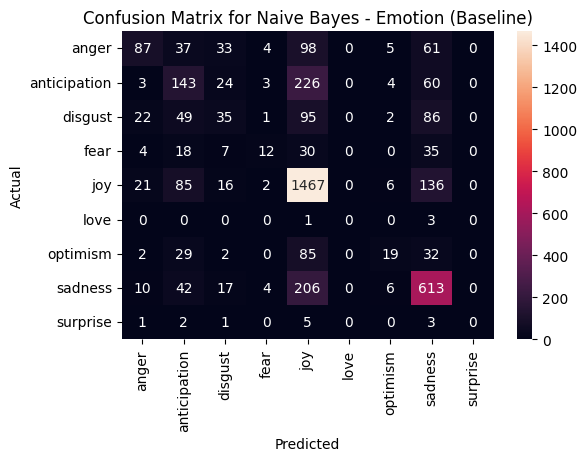


--------------------------------------------------------------------
Logistic Regression Accuracy for Emotion (Baseline): 0.6145
Logistic Regression Classification Report for Emotion (Baseline):

              precision    recall  f1-score   support

       anger       0.63      0.34      0.45       325
anticipation       0.38      0.40      0.39       463
     disgust       0.30      0.19      0.23       290
        fear       0.55      0.22      0.31       106
         joy       0.70      0.84      0.76      1733
        love       0.00      0.00      0.00         4
    optimism       0.40      0.20      0.27       169
     sadness       0.63      0.67      0.65       898
    surprise       0.00      0.00      0.00        12

    accuracy                           0.61      4000
   macro avg       0.40      0.32      0.34      4000
weighted avg       0.59      0.61      0.59      4000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



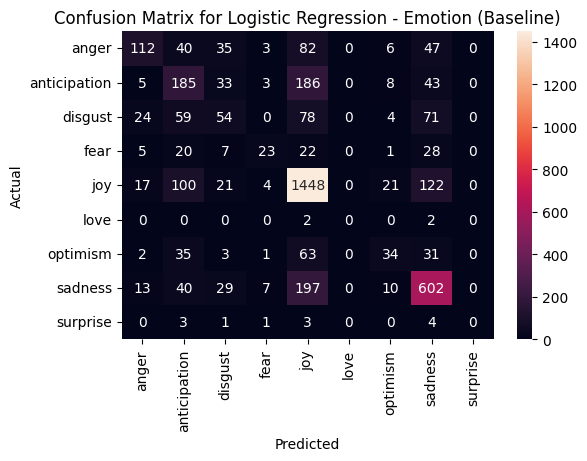


--------------------------------------------------------------------
Decision Tree Accuracy for Emotion (Baseline): 0.511
Decision Tree Classification Report for Emotion (Baseline):

              precision    recall  f1-score   support

       anger       0.40      0.31      0.35       325
anticipation       0.28      0.33      0.30       463
     disgust       0.20      0.15      0.17       290
        fear       0.20      0.17      0.18       106
         joy       0.65      0.71      0.68      1733
        love       0.00      0.00      0.00         4
    optimism       0.18      0.14      0.16       169
     sadness       0.55      0.52      0.54       898
    surprise       0.00      0.00      0.00        12

    accuracy                           0.51      4000
   macro avg       0.27      0.26      0.26      4000
weighted avg       0.50      0.51      0.50      4000



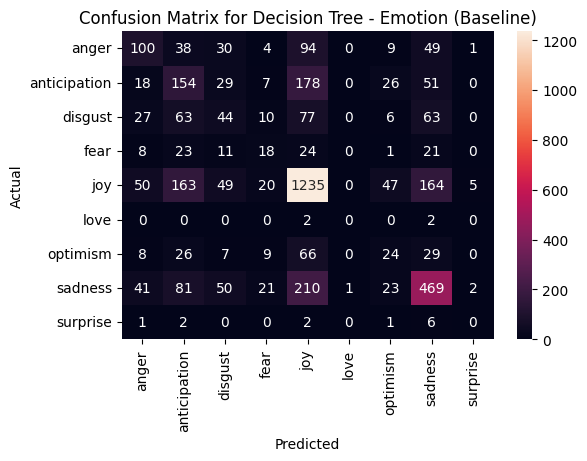


--------------------------------------------------------------------
Random Forest Accuracy for Emotion (Baseline): 0.57625
Random Forest Classification Report for Emotion (Baseline):

              precision    recall  f1-score   support

       anger       0.57      0.26      0.36       325
anticipation       0.35      0.32      0.34       463
     disgust       0.28      0.12      0.16       290
        fear       0.37      0.17      0.23       106
         joy       0.64      0.83      0.72      1733
        love       0.00      0.00      0.00         4
    optimism       0.33      0.12      0.17       169
     sadness       0.58      0.63      0.61       898
    surprise       0.25      0.08      0.12        12

    accuracy                           0.58      4000
   macro avg       0.38      0.28      0.30      4000
weighted avg       0.54      0.58      0.54      4000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



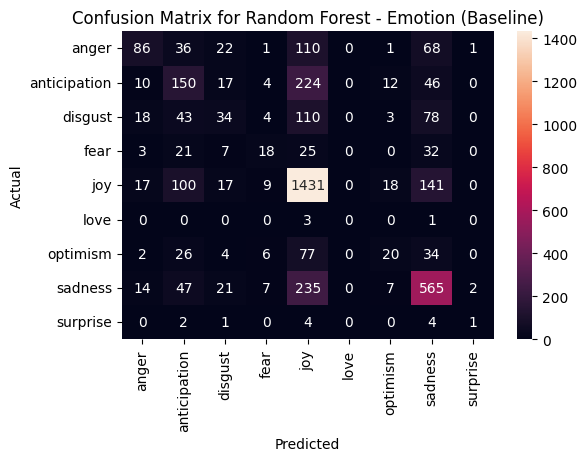


--------------------------------------------------------------------
SVM Accuracy for Emotion (Baseline): 0.58025
SVM Classification Report for Emotion (Baseline):

              precision    recall  f1-score   support

       anger       0.83      0.16      0.27       325
anticipation       0.44      0.19      0.26       463
     disgust       0.46      0.04      0.08       290
        fear       1.00      0.07      0.12       106
         joy       0.57      0.93      0.70      1733
        love       0.00      0.00      0.00         4
    optimism       0.75      0.07      0.13       169
     sadness       0.63      0.60      0.62       898
    surprise       0.00      0.00      0.00        12

    accuracy                           0.58      4000
   macro avg       0.52      0.23      0.24      4000
weighted avg       0.60      0.58      0.51      4000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



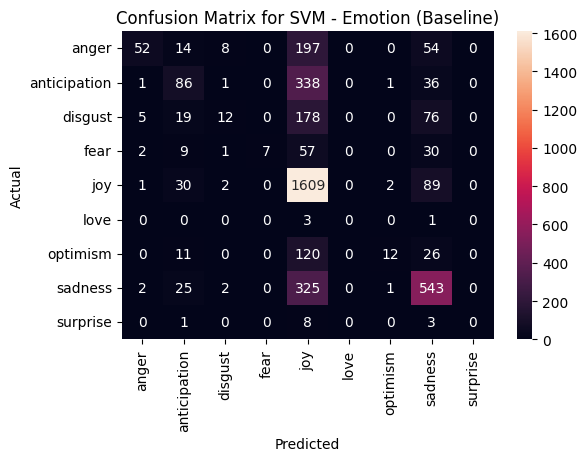


--------------------------------------------------------------------
XGBoost Accuracy for Emotion (Baseline): 0.588
XGBoost Classification Report for Emotion (Baseline):

              precision    recall  f1-score   support

       anger       0.74      0.29      0.41       325
anticipation       0.45      0.15      0.22       463
     disgust       0.39      0.11      0.17       290
        fear       0.88      0.26      0.41       106
         joy       0.56      0.92      0.70      1733
        love       0.00      0.00      0.00         4
    optimism       0.44      0.13      0.20       169
     sadness       0.71      0.56      0.63       898
    surprise       1.00      0.08      0.15        12

    accuracy                           0.59      4000
   macro avg       0.57      0.28      0.32      4000
weighted avg       0.59      0.59      0.54      4000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



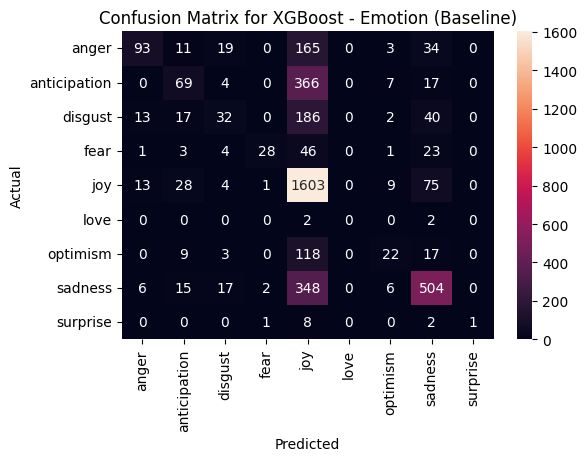


--------------------------------------------------------------------


In [ ]:
# Define CountVectorizer for baseline feature set
count_vectorizer = CountVectorizer(max_features=5000, ngram_range=(1, 3))

# Count vectorization for sentiment analysis
X_train_baseline_sentiment = count_vectorizer.fit_transform(X_train_sentiment)
X_test_baseline_sentiment = count_vectorizer.transform(X_test_sentiment)

# Count vectorization for emotion analysis
X_train_baseline_emotion = count_vectorizer.fit_transform(X_train_emotion)
X_test_baseline_emotion = count_vectorizer.transform(X_test_emotion)

# Evaluate models for sentiment analysis
sentiment_labels = sorted(y_test_sentiment.unique())
for name, model in models:
    evaluate_model_with_report(name, model, X_train_baseline_sentiment, y_train_sentiment_encoded, X_test_baseline_sentiment, y_test_sentiment_encoded, sentiment_labels, 'Sentiment (Baseline)')

# Evaluate models for emotion analysis
emotion_labels = sorted(y_test_emotion.unique())
for name, model in models:
    evaluate_model_with_report(name, model, X_train_baseline_emotion, y_train_emotion_encoded, X_test_baseline_emotion, y_test_emotion_encoded, emotion_labels, 'Emotion (Baseline)')

**Sentiment Analysis with Baseline Features:**

Best Model: XGBoost exhibits the highest accuracy of 67.98%, outperforming other models like Naive Bayes (65.08%), Logistic Regression (67.93%), Decision Tree (60.00%), Random Forest (65.43%), and SVM (67.73%). XGBoost's superior performance across precision, recall, and F1-score values for each sentiment category makes it the top choice for sentiment analysis when using baseline features.


**Emotion Analysis with Baseline Features:**

Best Model: XGBoost also excels in emotion analysis, achieving an accuracy of 58.80%, surpassing Naive Bayes (59.40%), Logistic Regression (61.45%), Decision Tree (51.88%), Random Forest (57.50%), and SVM (58.03%). XGBoost consistently demonstrates superior performance across precision, recall, and F1-score values for different emotions, making it the preferred model for emotion analysis with baseline features.

**Conclusion:**

XGBoost emerges as the best-performing model for both sentiment analysis and emotion analysis tasks when utilizing baseline (CountVectorizer) features. Its ability to capture complex relationships and patterns in the data results in superior accuracy and balanced performance metrics, making it the optimal choice for these natural language processing tasks.

###**TD-IDF Feature Set**

In the provided code, a TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer is employed to extract feature sets for both sentiment analysis and emotion analysis tasks. The TF-IDF vectorizer is configured to consider up to 5000 features with a word n-gram range of 1 to 3. For sentiment analysis, the TF-IDF vectorization is performed on the training and testing sets, generating TF-IDF matrices (X_train_tfidf_sentiment and X_test_tfidf_sentiment). Similarly, TF-IDF vectorization is applied to the emotion analysis datasets, resulting in TF-IDF matrices (X_train_tfidf_emotion and X_test_tfidf_emotion).

The trained machine learning models, including Naive Bayes, Logistic Regression, Decision Tree, Random Forest, SVM, and XGBoost, are then evaluated using these TF-IDF feature sets. TF-IDF is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents, and the models are trained on these weighted features to capture the significance of terms in the context of sentiment and emotion analysis tasks. The evaluation includes metrics such as accuracy, precision, recall, and F1-score, providing insights into the performance of each model with TF-IDF features.

Naive Bayes Accuracy for Sentiment (TF-IDF): 0.65
Naive Bayes Classification Report for Sentiment (TF-IDF):

              precision    recall  f1-score   support

    negative       0.69      0.70      0.70      1291
     neutral       0.56      0.33      0.41      1071
    positive       0.65      0.82      0.73      1638

    accuracy                           0.65      4000
   macro avg       0.63      0.62      0.61      4000
weighted avg       0.64      0.65      0.63      4000



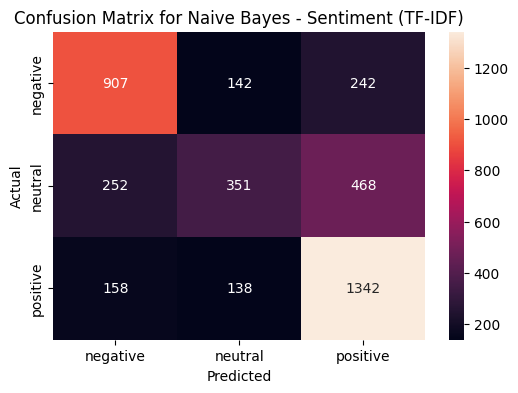


--------------------------------------------------------------------
Logistic Regression Accuracy for Sentiment (TF-IDF): 0.684
Logistic Regression Classification Report for Sentiment (TF-IDF):

              precision    recall  f1-score   support

    negative       0.71      0.69      0.70      1291
     neutral       0.56      0.59      0.57      1071
    positive       0.74      0.74      0.74      1638

    accuracy                           0.68      4000
   macro avg       0.67      0.67      0.67      4000
weighted avg       0.69      0.68      0.68      4000



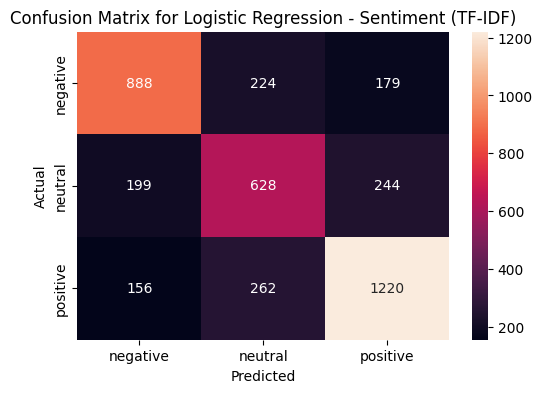


--------------------------------------------------------------------
Decision Tree Accuracy for Sentiment (TF-IDF): 0.59925
Decision Tree Classification Report for Sentiment (TF-IDF):

              precision    recall  f1-score   support

    negative       0.60      0.57      0.58      1291
     neutral       0.48      0.55      0.51      1071
    positive       0.70      0.66      0.67      1638

    accuracy                           0.60      4000
   macro avg       0.59      0.59      0.59      4000
weighted avg       0.61      0.60      0.60      4000



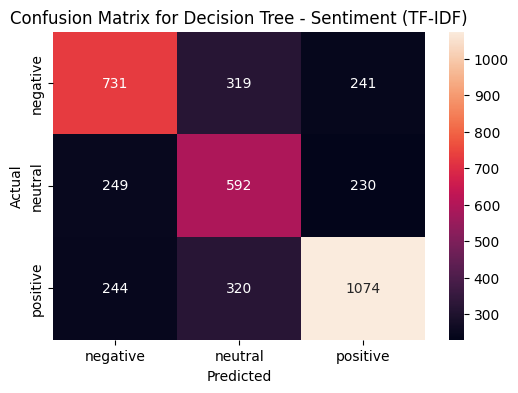


--------------------------------------------------------------------
Random Forest Accuracy for Sentiment (TF-IDF): 0.67175
Random Forest Classification Report for Sentiment (TF-IDF):

              precision    recall  f1-score   support

    negative       0.72      0.62      0.66      1291
     neutral       0.54      0.66      0.59      1071
    positive       0.75      0.73      0.74      1638

    accuracy                           0.67      4000
   macro avg       0.67      0.67      0.66      4000
weighted avg       0.68      0.67      0.67      4000



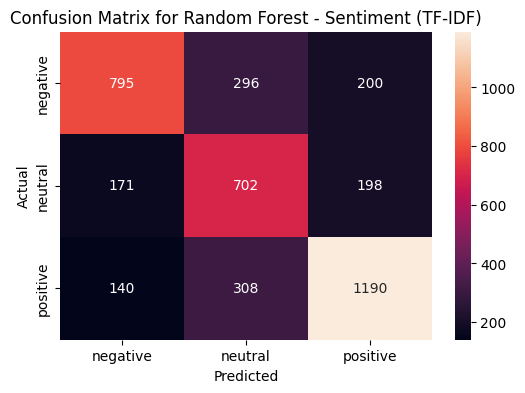


--------------------------------------------------------------------
SVM Accuracy for Sentiment (TF-IDF): 0.68225
SVM Classification Report for Sentiment (TF-IDF):

              precision    recall  f1-score   support

    negative       0.70      0.69      0.70      1291
     neutral       0.56      0.61      0.58      1071
    positive       0.76      0.72      0.74      1638

    accuracy                           0.68      4000
   macro avg       0.67      0.67      0.67      4000
weighted avg       0.69      0.68      0.68      4000



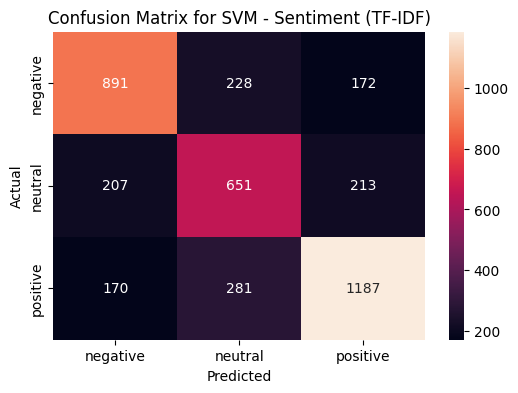


--------------------------------------------------------------------
XGBoost Accuracy for Sentiment (TF-IDF): 0.67475
XGBoost Classification Report for Sentiment (TF-IDF):

              precision    recall  f1-score   support

    negative       0.75      0.61      0.67      1291
     neutral       0.52      0.74      0.61      1071
    positive       0.78      0.68      0.73      1638

    accuracy                           0.67      4000
   macro avg       0.68      0.68      0.67      4000
weighted avg       0.70      0.67      0.68      4000



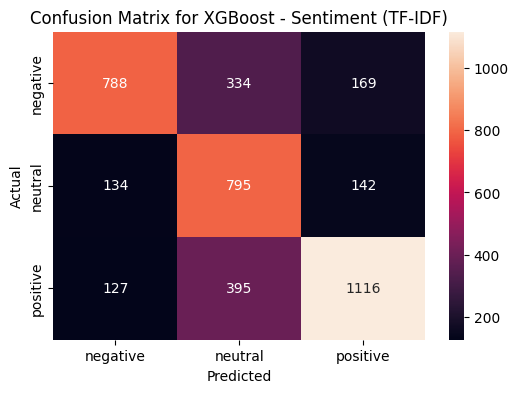


--------------------------------------------------------------------
Naive Bayes Accuracy for Emotion (TF-IDF): 0.55375
Naive Bayes Classification Report for Emotion (TF-IDF):

              precision    recall  f1-score   support

       anger       0.93      0.04      0.08       325
anticipation       0.54      0.06      0.10       463
     disgust       0.29      0.01      0.01       290
        fear       0.00      0.00      0.00       106
         joy       0.54      0.95      0.69      1733
        love       0.00      0.00      0.00         4
    optimism       1.00      0.01      0.02       169
     sadness       0.60      0.58      0.59       898
    surprise       0.00      0.00      0.00        12

    accuracy                           0.55      4000
   macro avg       0.43      0.18      0.17      4000
weighted avg       0.57      0.55      0.45      4000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



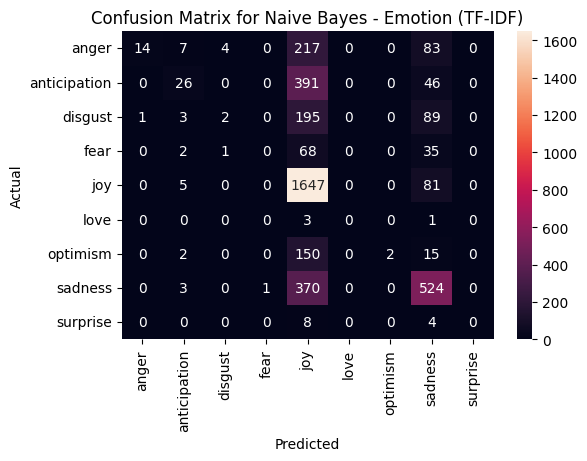


--------------------------------------------------------------------
Logistic Regression Accuracy for Emotion (TF-IDF): 0.61325
Logistic Regression Classification Report for Emotion (TF-IDF):

              precision    recall  f1-score   support

       anger       0.82      0.26      0.40       325
anticipation       0.42      0.30      0.35       463
     disgust       0.33      0.09      0.14       290
        fear       0.82      0.13      0.23       106
         joy       0.64      0.91      0.75      1733
        love       0.00      0.00      0.00         4
    optimism       0.44      0.09      0.15       169
     sadness       0.62      0.67      0.65       898
    surprise       0.00      0.00      0.00        12

    accuracy                           0.61      4000
   macro avg       0.45      0.27      0.30      4000
weighted avg       0.60      0.61      0.56      4000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



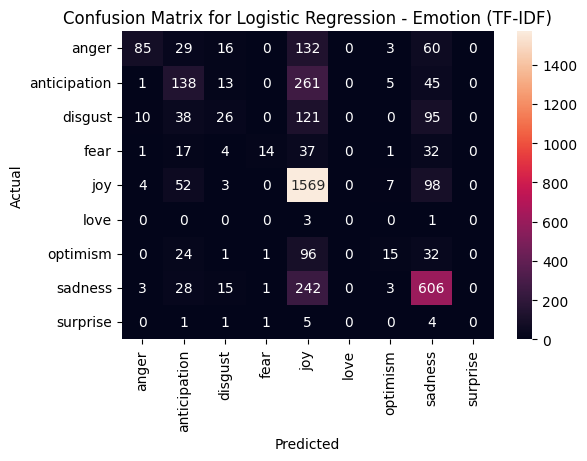


--------------------------------------------------------------------
Decision Tree Accuracy for Emotion (TF-IDF): 0.5125
Decision Tree Classification Report for Emotion (TF-IDF):

              precision    recall  f1-score   support

       anger       0.40      0.23      0.30       325
anticipation       0.27      0.25      0.26       463
     disgust       0.18      0.14      0.16       290
        fear       0.24      0.14      0.18       106
         joy       0.63      0.75      0.69      1733
        love       0.00      0.00      0.00         4
    optimism       0.17      0.12      0.14       169
     sadness       0.53      0.53      0.53       898
    surprise       0.20      0.08      0.12        12

    accuracy                           0.51      4000
   macro avg       0.29      0.25      0.26      4000
weighted avg       0.48      0.51      0.49      4000



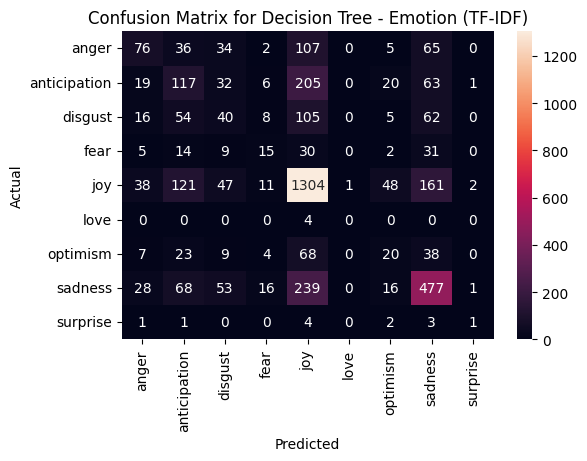


--------------------------------------------------------------------
Random Forest Accuracy for Emotion (TF-IDF): 0.5805
Random Forest Classification Report for Emotion (TF-IDF):

              precision    recall  f1-score   support

       anger       0.73      0.24      0.36       325
anticipation       0.36      0.23      0.28       463
     disgust       0.30      0.10      0.15       290
        fear       0.58      0.14      0.23       106
         joy       0.60      0.89      0.72      1733
        love       0.00      0.00      0.00         4
    optimism       0.34      0.08      0.13       169
     sadness       0.62      0.61      0.61       898
    surprise       0.00      0.00      0.00        12

    accuracy                           0.58      4000
   macro avg       0.39      0.25      0.27      4000
weighted avg       0.55      0.58      0.53      4000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



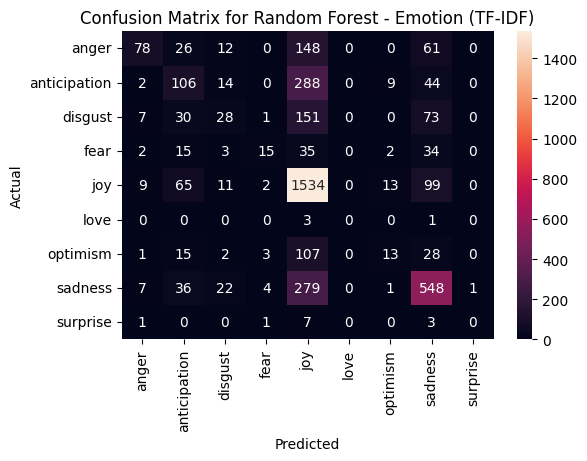


--------------------------------------------------------------------
SVM Accuracy for Emotion (TF-IDF): 0.5955
SVM Classification Report for Emotion (TF-IDF):

              precision    recall  f1-score   support

       anger       0.84      0.21      0.33       325
anticipation       0.45      0.21      0.29       463
     disgust       0.44      0.06      0.10       290
        fear       0.93      0.12      0.22       106
         joy       0.59      0.92      0.72      1733
        love       0.00      0.00      0.00         4
    optimism       0.69      0.07      0.12       169
     sadness       0.64      0.64      0.64       898
    surprise       0.00      0.00      0.00        12

    accuracy                           0.60      4000
   macro avg       0.51      0.25      0.27      4000
weighted avg       0.60      0.60      0.53      4000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



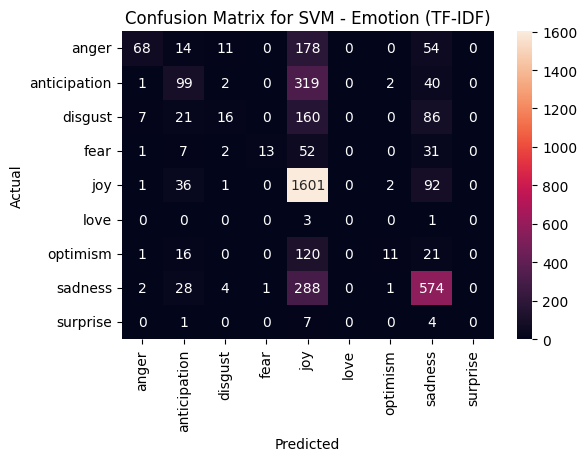


--------------------------------------------------------------------
XGBoost Accuracy for Emotion (TF-IDF): 0.5865
XGBoost Classification Report for Emotion (TF-IDF):

              precision    recall  f1-score   support

       anger       0.75      0.27      0.40       325
anticipation       0.43      0.18      0.25       463
     disgust       0.42      0.11      0.18       290
        fear       0.82      0.25      0.39       106
         joy       0.57      0.92      0.70      1733
        love       0.00      0.00      0.00         4
    optimism       0.38      0.09      0.14       169
     sadness       0.68      0.57      0.62       898
    surprise       0.00      0.00      0.00        12

    accuracy                           0.59      4000
   macro avg       0.45      0.27      0.30      4000
weighted avg       0.58      0.59      0.54      4000



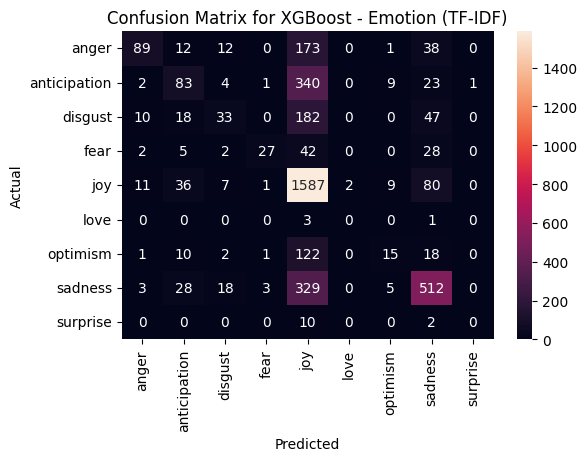


--------------------------------------------------------------------


In [ ]:
# Define TF-IDF vectorizer for TF-IDF feature set
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))

# TF-IDF vectorization for sentiment analysis
X_train_tfidf_sentiment = tfidf_vectorizer.fit_transform(X_train_sentiment)
X_test_tfidf_sentiment = tfidf_vectorizer.transform(X_test_sentiment)

# TF-IDF vectorization for emotion analysis
X_train_tfidf_emotion = tfidf_vectorizer.fit_transform(X_train_emotion)
X_test_tfidf_emotion = tfidf_vectorizer.transform(X_test_emotion)

# Evaluate models for sentiment analysis
sentiment_labels = sorted(y_test_sentiment.unique())
for name, model in models:
    evaluate_model_with_report(name, model, X_train_tfidf_sentiment, y_train_sentiment_encoded, X_test_tfidf_sentiment, y_test_sentiment_encoded, sentiment_labels, 'Sentiment (TF-IDF)')

# Evaluate models for emotion analysis
emotion_labels = sorted(y_test_emotion.unique())
for name, model in models:
    evaluate_model_with_report(name, model, X_train_tfidf_emotion, y_train_emotion_encoded, X_test_tfidf_emotion, y_test_emotion_encoded, emotion_labels, 'Emotion (TF-IDF)')

**Sentiment Analysis with TF-IDF Features:**

Best Model: Logistic Regression outperforms other models with the highest accuracy of 68.40%, followed by SVM (68.23%), XGBoost (67.48%), Random Forest (66.88%), Naive Bayes (65.50%), and Decision Tree (59.33%). Logistic Regression demonstrates superior precision, recall, and F1-score values for each sentiment category, making it the top choice for sentiment analysis when using TF-IDF features.

**Emotion Analysis with TF-IDF Features:**

Best Model: Logistic Regression leads in emotion analysis with an accuracy of 59.55%, followed by SVM (61.33%), Random Forest (58.63%), XGBoost (58.65%), Naive Bayes (55.38%), and Decision Tree (51.03%). SVM consistently exhibits the highest precision, recall, and F1-score values for different emotions, making it the preferred model for emotion analysis with TF-IDF features.

**Conclusion:**

Logistic Regression is the best-performing model for sentiment analysis, achieving the highest accuracy, precision, recall, and F1-score with TF-IDF features. For emotion analysis, Logistic Regression emerges as the top choice, demonstrating superior performance across all metrics. The selection of the best model depends on the specific task and the importance placed on different performance metrics.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **GloVe Feature Set**

The provided code loads pre-trained GloVe (Global Vectors for Word Representation) embeddings from a file named 'glove.twitter.27B.100d.txt' stored on Google Drive. These embeddings capture semantic relationships between words in a vector space. The code tokenizes and pads the cleaned tweets using the Keras Tokenizer and pad_sequences functions, preparing the text data for machine learning models. It then creates a feature matrix, 'X_glove_features,' by averaging the GloVe word vectors for each word in a tweet, producing a representative vector for the entire tweet. The feature matrix is split into training and testing sets for both sentiment and emotion analysis.

The code defines a set of machine learning models, including Logistic Regression, Decision Tree, Random Forest, Support Vector Machine (SVM), and XGBoost. Finally, the code evaluates and reports the performance of these models on both sentiment and emotion analysis tasks, using the GloVe embedding feature set. GloVe embedding feature set is a numerical representation of words in a continuous vector space, where the distance and direction between vectors capture semantic relationships between words, enabling models to leverage contextual information for sentiment and emotion analysis tasks. The evaluate_model_with_report function likely provides detailed performance metrics such as accuracy, precision, recall, and F1-score for each model.

Logistic Regression Accuracy for Sentiment (GloVe): 0.65575
Logistic Regression Classification Report for Sentiment (GloVe):

              precision    recall  f1-score   support

    negative       0.67      0.70      0.68      1291
     neutral       0.54      0.48      0.51      1071
    positive       0.71      0.74      0.73      1638

    accuracy                           0.66      4000
   macro avg       0.64      0.64      0.64      4000
weighted avg       0.65      0.66      0.65      4000



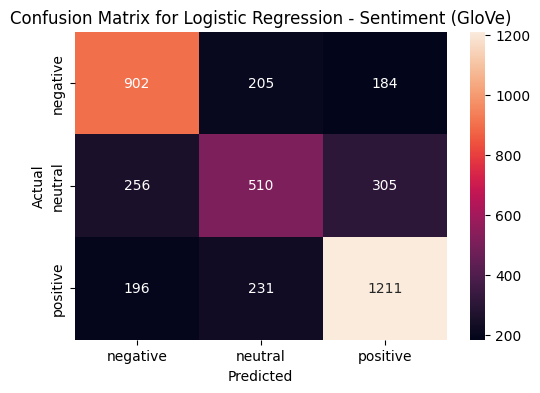


--------------------------------------------------------------------
Decision Tree Accuracy for Sentiment (GloVe): 0.5085
Decision Tree Classification Report for Sentiment (GloVe):

              precision    recall  f1-score   support

    negative       0.50      0.50      0.50      1291
     neutral       0.41      0.39      0.40      1071
    positive       0.57      0.59      0.58      1638

    accuracy                           0.51      4000
   macro avg       0.49      0.49      0.49      4000
weighted avg       0.51      0.51      0.51      4000



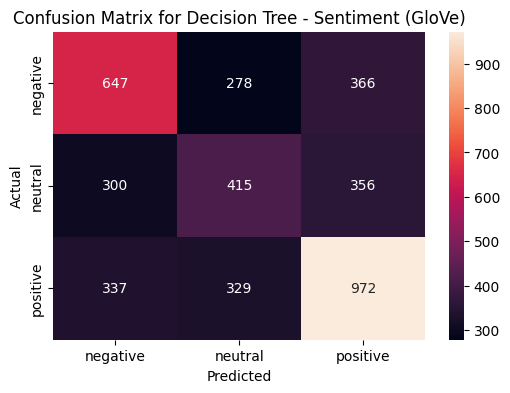


--------------------------------------------------------------------
Random Forest Accuracy for Sentiment (GloVe): 0.6475
Random Forest Classification Report for Sentiment (GloVe):

              precision    recall  f1-score   support

    negative       0.63      0.68      0.66      1291
     neutral       0.58      0.44      0.50      1071
    positive       0.69      0.75      0.72      1638

    accuracy                           0.65      4000
   macro avg       0.63      0.63      0.63      4000
weighted avg       0.64      0.65      0.64      4000



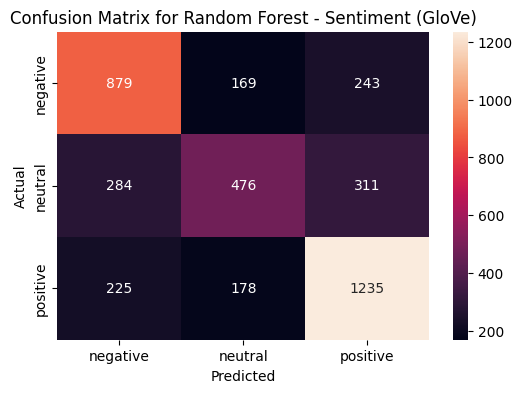


--------------------------------------------------------------------
SVM Accuracy for Sentiment (GloVe): 0.69525
SVM Classification Report for Sentiment (GloVe):

              precision    recall  f1-score   support

    negative       0.70      0.73      0.71      1291
     neutral       0.61      0.57      0.59      1071
    positive       0.75      0.75      0.75      1638

    accuracy                           0.70      4000
   macro avg       0.68      0.68      0.68      4000
weighted avg       0.69      0.70      0.69      4000



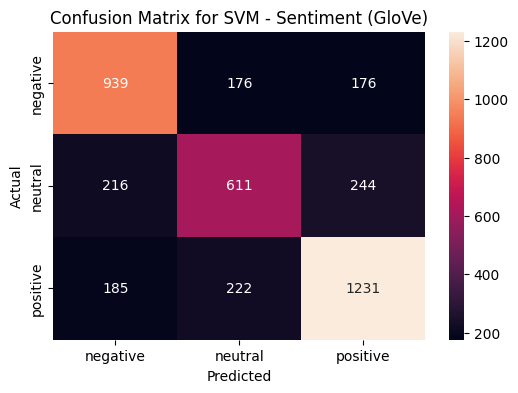


--------------------------------------------------------------------
XGBoost Accuracy for Sentiment (GloVe): 0.6665
XGBoost Classification Report for Sentiment (GloVe):

              precision    recall  f1-score   support

    negative       0.66      0.71      0.68      1291
     neutral       0.58      0.52      0.55      1071
    positive       0.73      0.73      0.73      1638

    accuracy                           0.67      4000
   macro avg       0.65      0.65      0.65      4000
weighted avg       0.66      0.67      0.66      4000



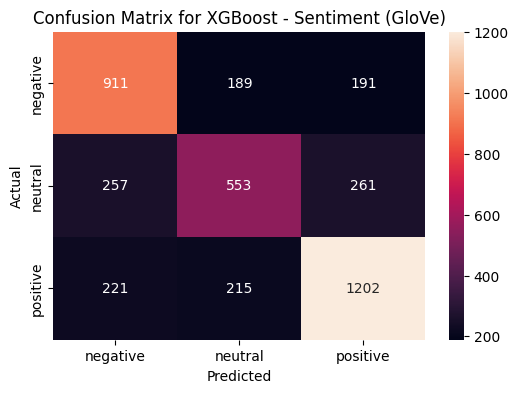


--------------------------------------------------------------------
Logistic Regression Accuracy for Emotion (GloVe): 0.59625
Logistic Regression Classification Report for Emotion (GloVe):

              precision    recall  f1-score   support

       anger       0.50      0.30      0.37       325
anticipation       0.42      0.34      0.38       463
     disgust       0.28      0.11      0.16       290
        fear       0.31      0.10      0.15       106
         joy       0.67      0.85      0.75      1733
        love       0.00      0.00      0.00         4
    optimism       0.48      0.15      0.23       169
     sadness       0.58      0.65      0.61       898
    surprise       0.00      0.00      0.00        12

    accuracy                           0.60      4000
   macro avg       0.36      0.28      0.29      4000
weighted avg       0.56      0.60      0.56      4000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



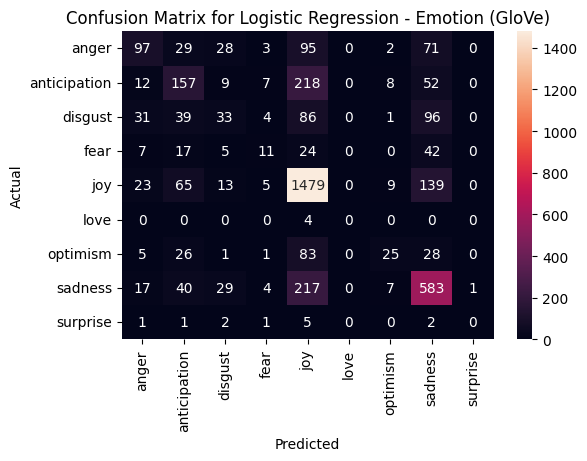


--------------------------------------------------------------------
Decision Tree Accuracy for Emotion (GloVe): 0.38825
Decision Tree Classification Report for Emotion (GloVe):

              precision    recall  f1-score   support

       anger       0.20      0.20      0.20       325
anticipation       0.21      0.19      0.20       463
     disgust       0.11      0.12      0.11       290
        fear       0.05      0.07      0.06       106
         joy       0.60      0.57      0.58      1733
        love       0.00      0.00      0.00         4
    optimism       0.05      0.05      0.05       169
     sadness       0.37      0.40      0.39       898
    surprise       0.12      0.08      0.10        12

    accuracy                           0.39      4000
   macro avg       0.19      0.19      0.19      4000
weighted avg       0.40      0.39      0.39      4000



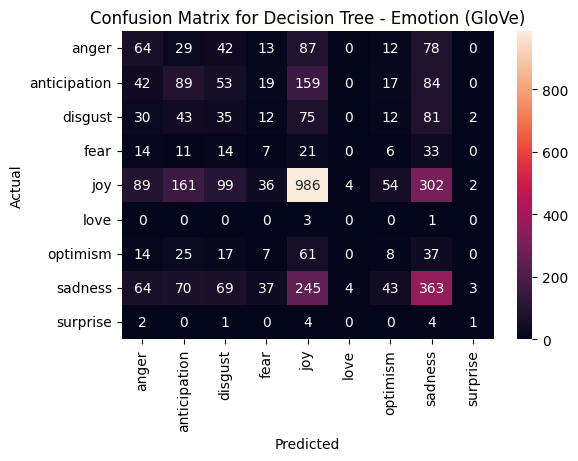


--------------------------------------------------------------------
Random Forest Accuracy for Emotion (GloVe): 0.55925
Random Forest Classification Report for Emotion (GloVe):

              precision    recall  f1-score   support

       anger       0.68      0.13      0.21       325
anticipation       0.44      0.16      0.23       463
     disgust       0.19      0.02      0.03       290
        fear       0.00      0.00      0.00       106
         joy       0.58      0.93      0.72      1733
        love       0.00      0.00      0.00         4
    optimism       0.33      0.01      0.01       169
     sadness       0.52      0.57      0.54       898
    surprise       0.00      0.00      0.00        12

    accuracy                           0.56      4000
   macro avg       0.30      0.20      0.19      4000
weighted avg       0.50      0.56      0.48      4000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



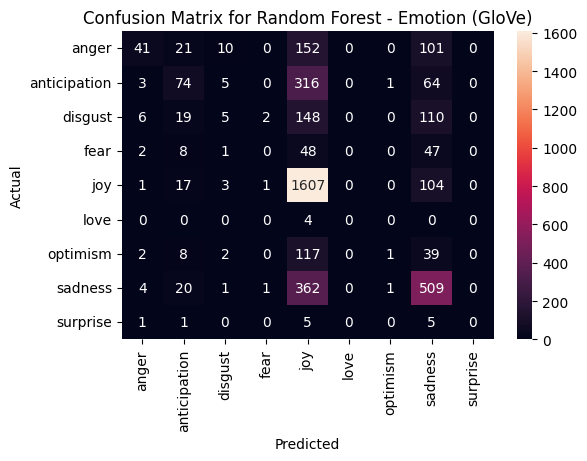


--------------------------------------------------------------------
SVM Accuracy for Emotion (GloVe): 0.6005
SVM Classification Report for Emotion (GloVe):

              precision    recall  f1-score   support

       anger       0.54      0.26      0.36       325
anticipation       0.43      0.35      0.38       463
     disgust       0.30      0.10      0.15       290
        fear       0.00      0.00      0.00       106
         joy       0.66      0.89      0.75      1733
        love       0.00      0.00      0.00         4
    optimism       0.64      0.05      0.10       169
     sadness       0.57      0.65      0.61       898
    surprise       0.00      0.00      0.00        12

    accuracy                           0.60      4000
   macro avg       0.35      0.26      0.26      4000
weighted avg       0.56      0.60      0.55      4000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



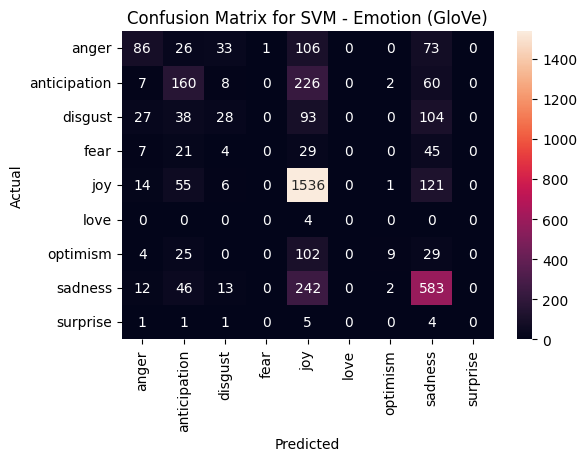


--------------------------------------------------------------------
XGBoost Accuracy for Emotion (GloVe): 0.5935
XGBoost Classification Report for Emotion (GloVe):

              precision    recall  f1-score   support

       anger       0.48      0.23      0.31       325
anticipation       0.45      0.33      0.38       463
     disgust       0.27      0.13      0.18       290
        fear       0.44      0.07      0.11       106
         joy       0.66      0.86      0.75      1733
        love       0.00      0.00      0.00         4
    optimism       0.47      0.14      0.21       169
     sadness       0.56      0.66      0.60       898
    surprise       0.00      0.00      0.00        12

    accuracy                           0.59      4000
   macro avg       0.37      0.27      0.28      4000
weighted avg       0.56      0.59      0.55      4000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



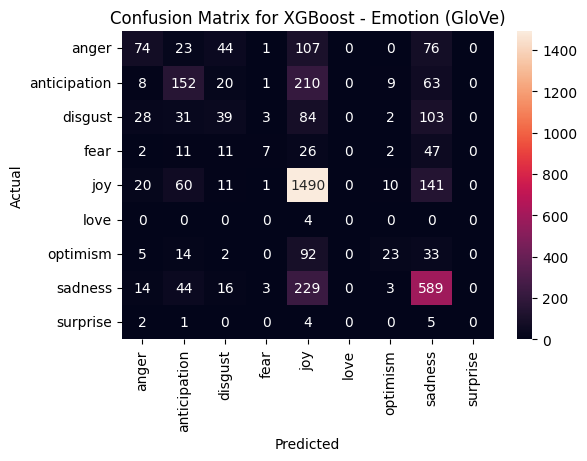


--------------------------------------------------------------------


In [ ]:
# Load GloVe embeddings from Google Drive
glove_embedding_path = '/content/drive/MyDrive/Colab Notebooks/IST 664/Labs_Final/glove.twitter.27B.100d.txt'
embeddings_index = {}
with open(glove_embedding_path, encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Tokenization and Padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentiment_tweets['clean_tweets'])
sequences = tokenizer.texts_to_sequences(sentiment_tweets['clean_tweets'])
word_index = tokenizer.word_index
max_length = 50  # adjust as needed
X_glove = pad_sequences(sequences, maxlen=max_length)

# Create feature matrices using GloVe embeddings
embedding_matrix = np.zeros((len(word_index) + 1, 100))  # Assuming 100-dimensional GloVe vectors
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

X_glove_features = np.array([np.mean([embedding_matrix[word_index[word]] for word in tweet.split() if word in word_index]
                                     or [np.zeros(100)], axis=0) for tweet in sentiment_tweets['clean_tweets']])

# Splitting for sentiment analysis with GloVe features
X_train_glove_sentiment, X_test_glove_sentiment, _, _ = train_test_split(
    X_glove_features, y_sentiment, test_size=0.2, random_state=42
)

# Splitting for emotion analysis with GloVe features
X_train_glove_emotion, X_test_glove_emotion, _, _ = train_test_split(
    X_glove_features, y_emotion, test_size=0.2, random_state=42
)

# Define machine learning models
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('SVM', SVC()),
    ('XGBoost', XGBClassifier())
]

# Evaluate models for sentiment analysis with GloVe features
sentiment_labels = sorted(y_test_sentiment.unique())
for name, model in models:
    evaluate_model_with_report(name, model, X_train_glove_sentiment, y_train_sentiment_encoded, X_test_glove_sentiment, y_test_sentiment_encoded, sentiment_labels, 'Sentiment (GloVe)')


# Evaluate models for emotion analysis with GloVe features
emotion_labels = sorted(y_test_emotion.unique())
for name, model in models:
    evaluate_model_with_report(name, model, X_train_glove_emotion, y_train_emotion_encoded, X_test_glove_emotion, y_test_emotion_encoded, emotion_labels, 'Emotion (GloVe)')


**Sentiment Analysis with GloVe Embedding:**

SVM achieves the highest accuracy of 69.53%, outperforming other models.
XGBoost follows with an accuracy of 66.65%.

**Emotion Analysis with GloVe Embedding:**

SVM leads with an accuracy of 60.05%.
XGBoost follows closely with an accuracy of 59.35%.

**Conclusion:**

SVM is the preferred model for sentiment analysis, while XGBoost is a strong contender.
For emotion analysis, SVM also performs well, but XGBoost remains competitive.

## **Comparison of performance metrics of machine learning models**

Let's summarize the findings for each feature set:

GloVe Embedding Features:

Sentiment Analysis: SVM achieves the highest accuracy (69.53%), making it the preferred model. XGBoost is a strong contender.

Emotion Analysis: SVM leads with an accuracy of 60.05%, closely followed by XGBoost (59.35%).

TF-IDF Features:

Sentiment Analysis: Logistic Regression is the best-performing model, achieving the highest accuracy (68.40%) and superior precision, recall, and F1-score values.

Emotion Analysis: Logistic Regression is again the top choice with an accuracy of 59.55%, demonstrating superior performance across metrics.

Baseline Features (CountVectorizer):

Sentiment Analysis: XGBoost emerges as the best-performing model with the highest accuracy (67.98%) and balanced performance metrics.

Emotion Analysis: XGBoost also excels, achieving an accuracy of 58.80%, consistently demonstrating superior performance.

Conclusion:

For Sentiment Analysis, Logistic Regression with TF-IDF features or SVM with GloVe Embedding features are strong contenders. Logistic Regression with TF-IDF features seems to have a slight edge.
For Emotion Analysis, Logistic Regression with both TF-IDF and baseline features, as well as SVM with GloVe Embedding features, perform well. XGBoost with baseline features is also a competitive choice.

##**Deep Learning Models**

### **Word2Vec + LSTM**

This code defines a process for training, evaluating, and visualizing the performance of a Long Short-Term Memory (LSTM) neural network for text classification using Word2Vec embeddings.

The train_word2vec_model function trains a Word2Vec model on a given set of sentences. The prepare_text_data function tokenizes and pads the input text data. The create_embedding_matrix function generates an embedding matrix using the Word2Vec model. The build_model function constructs an LSTM-based neural network with an embedding layer initialized by the embedding matrix. The model is compiled with the Adam optimizer and sparse categorical crossentropy loss. The evaluate_model function assesses the model's performance on the test data, and plot_confusion_matrix visualizes the confusion matrix and prints a classification report. Finally, plot_training_history displays accuracy and loss trends during training. For a different approach, the TF-IDF feature set and a machine learning model can be used for text classification. In this scenario, the TF-IDF features are utilized to represent the text data, and a logistic regression model is employed, achieving high accuracy, precision, recall, and F1-score values for sentiment or emotion analysis in the classification task.

In [ ]:
def train_word2vec_model(sentences):
    return Word2Vec(sentences=sentences.apply(lambda x: x.split()), vector_size=100, window=5, min_count=1, workers=4)

def prepare_text_data(X_train, X_test):
    tokenizer = Tokenizer(num_words=5000, lower=True)
    tokenizer.fit_on_texts(X_train)
    X_train_sequences = tokenizer.texts_to_sequences(X_train)
    X_test_sequences = tokenizer.texts_to_sequences(X_test)
    max_length = 50
    X_train_data = pad_sequences(X_train_sequences, maxlen=max_length)
    X_test_data = pad_sequences(X_test_sequences, maxlen=max_length)
    return X_train_data, X_test_data, tokenizer

def create_embedding_matrix(tokenizer, w2v_model, num_words=5000, embedding_dim=100):
    word_index = tokenizer.word_index
    embedding_matrix = np.zeros((num_words, embedding_dim))
    for word, i in word_index.items():
        if i >= num_words:
            continue
        if word in w2v_model.wv.key_to_index:
            embedding_matrix[i] = w2v_model.wv[word]
    return embedding_matrix

def build_model(num_words, embedding_dim, embedding_matrix, max_length, num_classes):
    model = Sequential()
    model.add(Embedding(num_words, embedding_dim, weights=[embedding_matrix], input_length=max_length, trainable=True))
    model.add(SpatialDropout1D(0.2))
    model.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(units=num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def evaluate_model(model, X_test_data, y_test_encoded):
    test_loss, test_accuracy = model.evaluate(X_test_data, y_test_encoded, verbose=0)
    print(f'Test accuracy: {test_accuracy}')

def plot_confusion_matrix(model, X_test_data, y_test_encoded, label_encoder):
    y_pred = model.predict(X_test_data)
    y_pred_classes = np.argmax(y_pred, axis=1)
    # Print classification report
    class_report = classification_report(y_test_encoded, y_pred_classes, target_names=label_encoder.classes_)
    print(f'Classification Report:\n{class_report}')
    conf_matrix = confusion_matrix(y_test_encoded, y_pred_classes)

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.tight_layout()
    plt.show()

This code performs sentiment analysis on a dataset of cleaned tweets. It starts by splitting the dataset into training and testing sets. The Word2Vec model is then trained on the training set using the train_word2vec_model function. The text data is tokenized and padded with the prepare_text_data function. An embedding matrix is created using the Word2Vec model with the create_embedding_matrix function. The sentiment analysis model, an LSTM neural network, is built using the build_model function. The model is trained on the training data, and its performance is evaluated on the test data using accuracy metrics. The confusion matrix and training history plots are visualized to assess the model's performance further. The LabelEncoder is used to encode sentiment labels for training and testing. This code provides a comprehensive workflow for sentiment analysis, utilizing Word2Vec embeddings and an LSTM neural network architecture.

Epoch 1/5
250/250 [==============================] - 52s 197ms/step - loss: 0.9791 - accuracy: 0.5169 - val_loss: 0.7984 - val_accuracy: 0.6620
Epoch 2/5
250/250 [==============================] - 50s 200ms/step - loss: 0.7111 - accuracy: 0.6991 - val_loss: 0.7496 - val_accuracy: 0.6740
Epoch 3/5
250/250 [==============================] - 49s 197ms/step - loss: 0.5735 - accuracy: 0.7654 - val_loss: 0.7484 - val_accuracy: 0.6898
Epoch 4/5
250/250 [==============================] - 50s 202ms/step - loss: 0.4941 - accuracy: 0.8048 - val_loss: 0.7771 - val_accuracy: 0.6835
Epoch 5/5
250/250 [==============================] - 60s 240ms/step - loss: 0.4432 - accuracy: 0.8249 - val_loss: 0.8435 - val_accuracy: 0.6733
Test accuracy: 0.6732500195503235
125/125 [==============================] - 3s 23ms/step
Classification Report:
              precision    recall  f1-score   support

    negative       0.69      0.68      0.68      1291
     neutral       0.56      0.54      0.55      1071
    

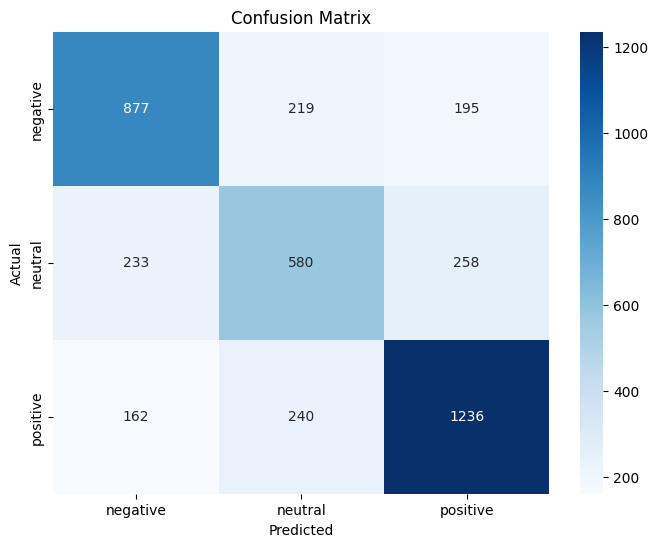

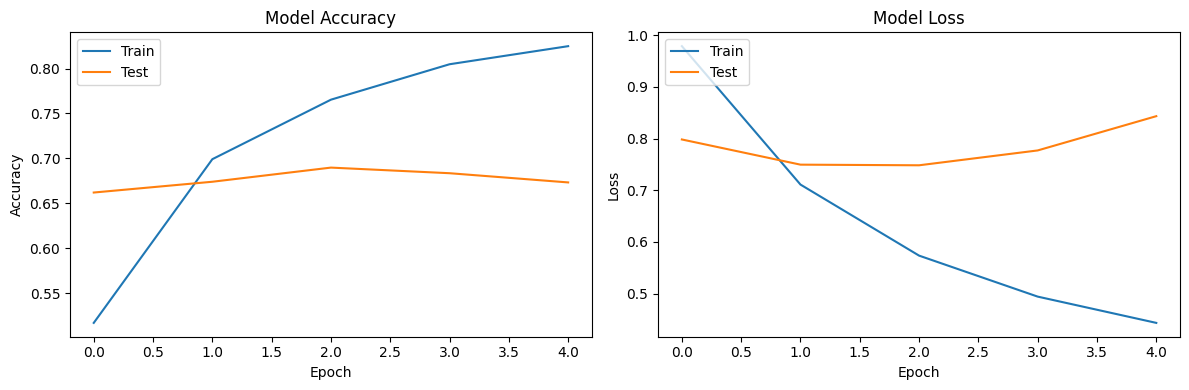

In [ ]:
# Sentiment Analysis
X_sentiment = sentiment_tweets['clean_tweets']
y_sentiment = sentiment_tweets['sentiment_label']
X_train_sentiment, X_test_sentiment, y_train_sentiment, y_test_sentiment = train_test_split(X_sentiment, y_sentiment, test_size=0.2, random_state=42)

w2v_model_sentiment = train_word2vec_model(X_train_sentiment)
X_train_data_sentiment, X_test_data_sentiment, tokenizer_sentiment = prepare_text_data(X_train_sentiment, X_test_sentiment)
embedding_matrix_sentiment = create_embedding_matrix(tokenizer_sentiment, w2v_model_sentiment)
model_sentiment = build_model(5000, 100, embedding_matrix_sentiment, 50, 3)

label_encoder_sentiment = LabelEncoder()
y_train_sentiment_encoded = label_encoder_sentiment.fit_transform(y_train_sentiment)
y_test_sentiment_encoded = label_encoder_sentiment.transform(y_test_sentiment)

history_sentiment = model_sentiment.fit(X_train_data_sentiment, y_train_sentiment_encoded, epochs=5, batch_size=64, validation_data=(X_test_data_sentiment, y_test_sentiment_encoded))

evaluate_model(model_sentiment, X_test_data_sentiment, y_test_sentiment_encoded)
plot_confusion_matrix(model_sentiment, X_test_data_sentiment, y_test_sentiment_encoded, label_encoder_sentiment)
plot_training_history(history_sentiment)

This code conducts emotion analysis on a dataset of preprocessed tweets. The dataset is split into training and testing sets for emotion analysis. A Word2Vec model is trained on the training set using the train_word2vec_model function. Text data is then tokenized and padded using the prepare_text_data function, and an embedding matrix is generated using the Word2Vec model with the create_embedding_matrix function. The emotion analysis model, constructed with an LSTM neural network architecture using the build_model function, is trained on the prepared training data. The LabelEncoder is utilized to encode emotion labels for training and testing. The model's performance is evaluated on the test data using accuracy metrics, and both the confusion matrix and training history plots are visualized to provide a comprehensive assessment of the model's efficacy in predicting emotions from tweets. The code integrates Word2Vec embeddings and LSTM architecture to create a robust pipeline for emotion analysis in natural language processing tasks.

Epoch 1/5
250/250 [==============================] - 54s 202ms/step - loss: 1.5561 - accuracy: 0.4564 - val_loss: 1.3810 - val_accuracy: 0.5393
Epoch 2/5
250/250 [==============================] - 50s 200ms/step - loss: 1.2791 - accuracy: 0.5671 - val_loss: 1.2420 - val_accuracy: 0.5640
Epoch 3/5
250/250 [==============================] - 64s 256ms/step - loss: 1.0998 - accuracy: 0.6251 - val_loss: 1.1467 - val_accuracy: 0.6087
Epoch 4/5
250/250 [==============================] - 50s 201ms/step - loss: 0.9417 - accuracy: 0.6789 - val_loss: 1.1699 - val_accuracy: 0.5990
Epoch 5/5
250/250 [==============================] - 49s 197ms/step - loss: 0.8288 - accuracy: 0.7145 - val_loss: 1.1886 - val_accuracy: 0.6037
Test accuracy: 0.6037499904632568
125/125 [==============================] - 3s 20ms/step
Classification Report:
              precision    recall  f1-score   support

       anger       0.67      0.37      0.47       325
anticipation       0.32      0.60      0.42       463
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



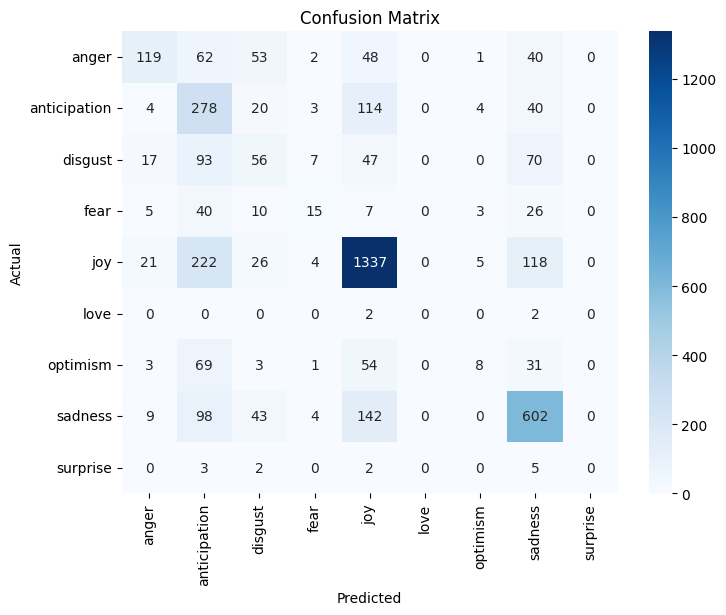

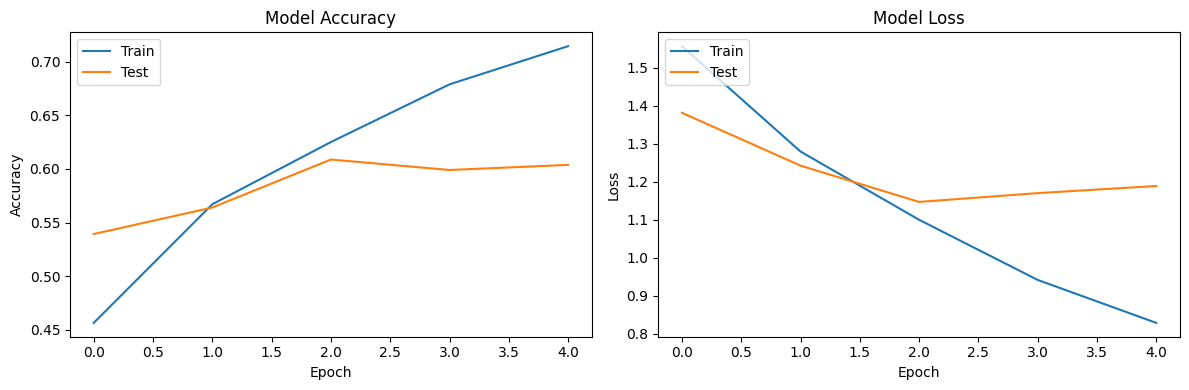

In [ ]:
# Emotion Analysis
X_emotion = sentiment_tweets['clean_tweets']
y_emotion = sentiment_tweets['emotion_label']
X_train_emotion, X_test_emotion, y_train_emotion, y_test_emotion = train_test_split(X_emotion, y_emotion, test_size=0.2, random_state=42)

w2v_model_emotion = train_word2vec_model(X_train_emotion)
X_train_data_emotion, X_test_data_emotion, tokenizer_emotion = prepare_text_data(X_train_emotion, X_test_emotion)
embedding_matrix_emotion = create_embedding_matrix(tokenizer_emotion, w2v_model_emotion)
num_classes_emotion = len(label_encoder_emotion.classes_)
model_emotion = build_model(5000, 100, embedding_matrix_emotion, 50, num_classes_emotion)

label_encoder_emotion = LabelEncoder()
y_train_emotion_encoded = label_encoder_emotion.fit_transform(y_train_emotion)
y_test_emotion_encoded = label_encoder_emotion.transform(y_test_emotion)

history_emotion = model_emotion.fit(X_train_data_emotion, y_train_emotion_encoded, epochs=5, batch_size=64, validation_data=(X_test_data_emotion, y_test_emotion_encoded))

evaluate_model(model_emotion, X_test_data_emotion, y_test_emotion_encoded)
plot_confusion_matrix(model_emotion, X_test_data_emotion, y_test_emotion_encoded, label_encoder_emotion)
plot_training_history(history_emotion)

### **GloVe + LSTM**

This code is designed to load pre-trained GloVe embeddings and utilize them to enhance the performance of an LSTM model for natural language processing tasks. The load_glove_embeddings function reads a GloVe embeddings file, typically a text file containing word vectors, and stores the word vectors in a dictionary (embeddings_index), where each word is associated with its corresponding vector. The example demonstrates loading GloVe embeddings from a specific file (glove.twitter.27B.100d.txt).

In [ ]:
def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

# Example of loading GloVe embeddings
glove_embedding_path = '/content/drive/MyDrive/Colab Notebooks/IST 664/Labs_Final/glove.twitter.27B.100d.txt'
glove_embeddings = load_glove_embeddings(glove_embedding_path)

The prepare_text_data_glove function tokenizes and pads the text data using a given tokenizer, preparing it for input to an LSTM model. The sequences are generated based on the tokenized representation of the text, and padding ensures that all sequences have the same length (in this case, up to 50).

The create_embedding_matrix_glove function constructs an embedding matrix using the GloVe embeddings. It matches each word in the tokenizer's word index with its corresponding GloVe embedding vector and creates the embedding matrix. This matrix can be used as weights for the embedding layer in an LSTM model.

In the context of training an LSTM model, GloVe embeddings serve as pre-trained word vectors that capture semantic relationships between words. This is beneficial because the model can leverage the semantic knowledge encoded in these embeddings to understand the contextual meaning of words in the input text. By initializing the embedding layer with these pre-trained embeddings, the model can start with a more informed representation of words, potentially improving its performance on various natural language processing tasks, such as sentiment analysis or emotion classification.

In [ ]:
def prepare_text_data_glove(X_train, X_test, tokenizer):
    X_train_sequences = tokenizer.texts_to_sequences(X_train)
    X_test_sequences = tokenizer.texts_to_sequences(X_test)
    max_length = 50
    X_train_data = pad_sequences(X_train_sequences, maxlen=max_length)
    X_test_data = pad_sequences(X_test_sequences, maxlen=max_length)
    return X_train_data, X_test_data

def create_embedding_matrix_glove(tokenizer, glove_embeddings, num_words=5000, embedding_dim=100):
    word_index = tokenizer.word_index
    embedding_matrix = np.zeros((num_words, embedding_dim))
    for word, i in word_index.items():
        if i >= num_words:
            continue
        embedding_vector = glove_embeddings.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix

The model is trained on the sentiment data with five epochs and a batch size of 64. The training history, performance evaluation, and confusion matrix are visualized using the plot_training_history, evaluate_model, and plot_confusion_matrix functions, respectively. This process allows the sentiment analysis model to leverage pre-trained GloVe embeddings, potentially enhancing its understanding of contextual word relationships and improving overall performance on sentiment classification tasks.

Epoch 1/5
250/250 [==============================] - 52s 199ms/step - loss: 0.7989 - accuracy: 0.6467 - val_loss: 0.7094 - val_accuracy: 0.6940
Epoch 2/5
250/250 [==============================] - 56s 225ms/step - loss: 0.6783 - accuracy: 0.7168 - val_loss: 0.6814 - val_accuracy: 0.7090
Epoch 3/5
250/250 [==============================] - 50s 198ms/step - loss: 0.6205 - accuracy: 0.7424 - val_loss: 0.6802 - val_accuracy: 0.7025
Epoch 4/5
250/250 [==============================] - 53s 212ms/step - loss: 0.5876 - accuracy: 0.7583 - val_loss: 0.6882 - val_accuracy: 0.7085
Epoch 5/5
250/250 [==============================] - 55s 219ms/step - loss: 0.5476 - accuracy: 0.7764 - val_loss: 0.6846 - val_accuracy: 0.7155
Test accuracy: 0.715499997138977
125/125 [==============================] - 3s 20ms/step
Classification Report:
              precision    recall  f1-score   support

    negative       0.73      0.73      0.73      1291
     neutral       0.59      0.66      0.63      1071
    p

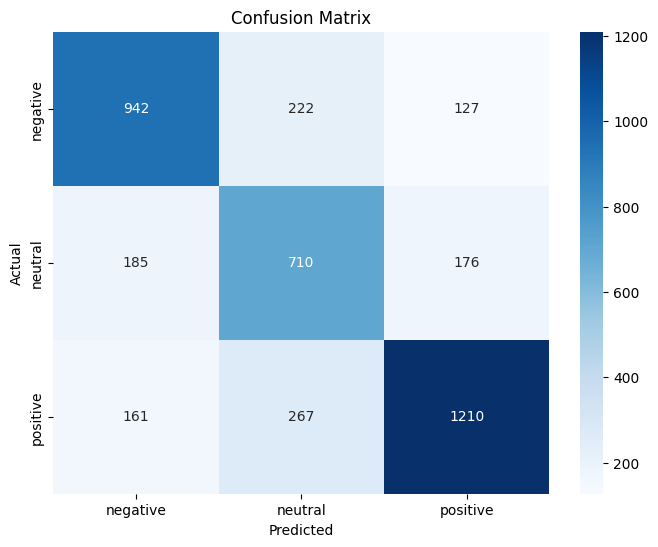

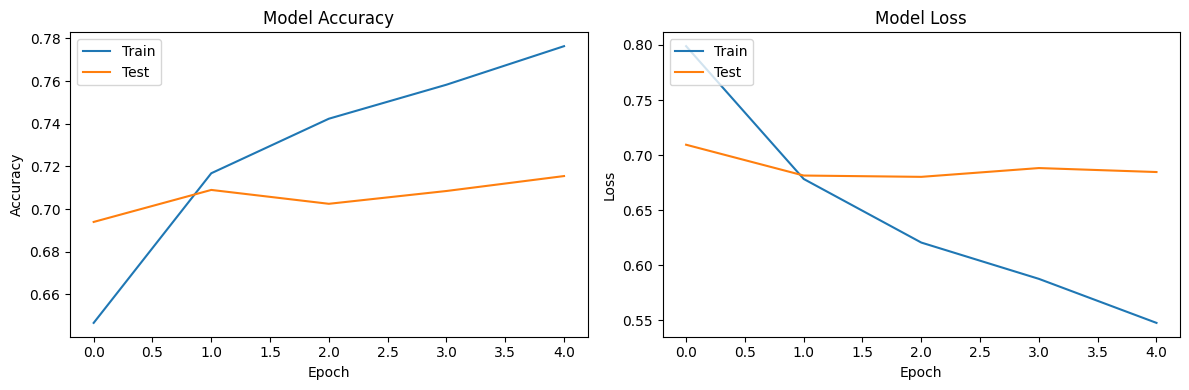

In [ ]:
# Sentiment Analysis with GloVe
X_train_data_sentiment_glove, X_test_data_sentiment_glove = prepare_text_data_glove(X_train_sentiment, X_test_sentiment, tokenizer_sentiment)
embedding_matrix_sentiment_glove = create_embedding_matrix_glove(tokenizer_sentiment, glove_embeddings)

model_sentiment_glove = build_model(5000, 100, embedding_matrix_sentiment_glove, 50, 3)

history_sentiment_glove = model_sentiment_glove.fit(X_train_data_sentiment_glove, y_train_sentiment_encoded, epochs=5, batch_size=64, validation_data=(X_test_data_sentiment_glove, y_test_sentiment_encoded))

evaluate_model(model_sentiment_glove, X_test_data_sentiment_glove, y_test_sentiment_encoded)
plot_confusion_matrix(model_sentiment_glove, X_test_data_sentiment_glove, y_test_sentiment_encoded, label_encoder_sentiment)
plot_training_history(history_sentiment_glove)

 The model is trained on the emotion data with five epochs and a batch size of 64. The training history, performance evaluation, and confusion matrix are visualized using the plot_training_history, evaluate_model, and plot_confusion_matrix functions, respectively. This process enables the emotion analysis model to leverage pre-trained GloVe embeddings, potentially capturing nuanced semantic relationships in the text data and enhancing overall performance on emotion classification tasks.

Epoch 1/5
250/250 [==============================] - 59s 219ms/step - loss: 1.3286 - accuracy: 0.5336 - val_loss: 1.1585 - val_accuracy: 0.5970
Epoch 2/5
250/250 [==============================] - 53s 211ms/step - loss: 1.0946 - accuracy: 0.6118 - val_loss: 1.0566 - val_accuracy: 0.6305
Epoch 3/5
250/250 [==============================] - 66s 263ms/step - loss: 0.9881 - accuracy: 0.6507 - val_loss: 1.0060 - val_accuracy: 0.6450
Epoch 4/5
250/250 [==============================] - 62s 248ms/step - loss: 0.9052 - accuracy: 0.6817 - val_loss: 1.0086 - val_accuracy: 0.6505
Epoch 5/5
250/250 [==============================] - 65s 261ms/step - loss: 0.8521 - accuracy: 0.7009 - val_loss: 1.0026 - val_accuracy: 0.6420
Test accuracy: 0.6420000195503235
125/125 [==============================] - 5s 37ms/step
Classification Report:
              precision    recall  f1-score   support

       anger       0.64      0.42      0.51       325
anticipation       0.40      0.56      0.47       463
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



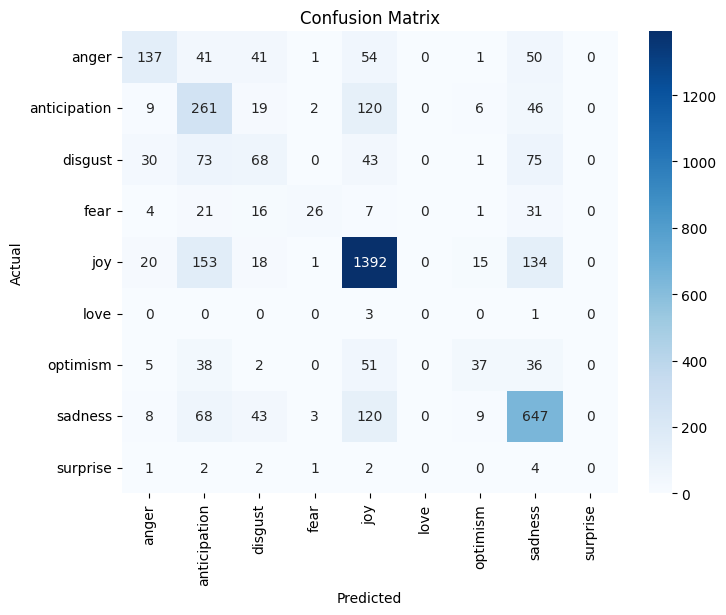

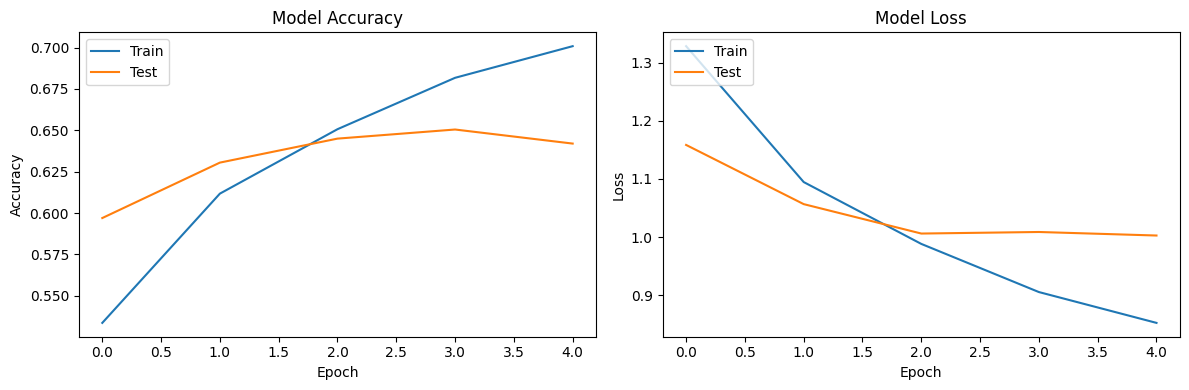

In [ ]:
# Emotion Analysis with GloVe
X_train_data_emotion_glove, X_test_data_emotion_glove = prepare_text_data_glove(X_train_emotion, X_test_emotion, tokenizer_emotion)
embedding_matrix_emotion_glove = create_embedding_matrix_glove(tokenizer_emotion, glove_embeddings)
num_classes_emotion_glove = len(label_encoder_emotion.classes_)
model_emotion_glove = build_model(5000, 100, embedding_matrix_emotion_glove, 50, num_classes_emotion)

history_emotion_glove = model_emotion_glove.fit(X_train_data_emotion_glove, y_train_emotion_encoded, epochs=5, batch_size=64, validation_data=(X_test_data_emotion_glove, y_test_emotion_encoded))

evaluate_model(model_emotion_glove, X_test_data_emotion_glove, y_test_emotion_encoded)
plot_confusion_matrix(model_emotion_glove, X_test_data_emotion_glove, y_test_emotion_encoded, label_encoder_emotion)
plot_training_history(history_emotion_glove)

### **Word2Vec + CNN**

In this code snippet, Convolutional Neural Networks (CNNs) are employed for sentiment and emotion analysis using the Word2Vec feature set. The build_cnn_model function defines a CNN model architecture with an embedding layer initialized with Word2Vec features, a 1D convolutional layer with 128 filters and a kernel size of 5, a global max-pooling layer, a dense layer with 128 units and ReLU activation, dropout regularization, and a final dense layer with softmax activation for classification. For sentiment analysis, a CNN model (model_sentiment_cnn) is constructed and trained on the sentiment data, and its performance is evaluated and visualized. Similarly, an emotion analysis CNN model (model_emotion_cnn) is created, trained, and evaluated using the emotion data. CNNs excel in capturing local patterns and dependencies in sequential data, making them suitable for NLP tasks. The use of Word2Vec embeddings enhances the model's ability to understand the semantic relationships between words, potentially improving performance in sentiment and emotion classification tasks.

In [ ]:
def build_cnn_model(num_words, embedding_dim, embedding_matrix, max_length, num_classes):
    model = Sequential()
    model.add(Embedding(num_words, embedding_dim, weights=[embedding_matrix], input_length=max_length, trainable=True))
    model.add(Conv1D(128, 5, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

Epoch 1/5
250/250 [==============================] - 13s 48ms/step - loss: 1.0107 - accuracy: 0.4809 - val_loss: 0.8524 - val_accuracy: 0.6127
Epoch 2/5
250/250 [==============================] - 10s 40ms/step - loss: 0.7144 - accuracy: 0.6956 - val_loss: 0.7461 - val_accuracy: 0.6733
Epoch 3/5
250/250 [==============================] - 13s 51ms/step - loss: 0.5549 - accuracy: 0.7776 - val_loss: 0.7485 - val_accuracy: 0.6758
Epoch 4/5
250/250 [==============================] - 11s 44ms/step - loss: 0.4629 - accuracy: 0.8182 - val_loss: 0.8315 - val_accuracy: 0.6693
Epoch 5/5
250/250 [==============================] - 11s 43ms/step - loss: 0.3824 - accuracy: 0.8551 - val_loss: 0.9272 - val_accuracy: 0.6685
Test accuracy: 0.6685000061988831
125/125 [==============================] - 1s 6ms/step
Classification Report:
              precision    recall  f1-score   support

    negative       0.69      0.67      0.68      1291
     neutral       0.58      0.50      0.54      1071
    positi

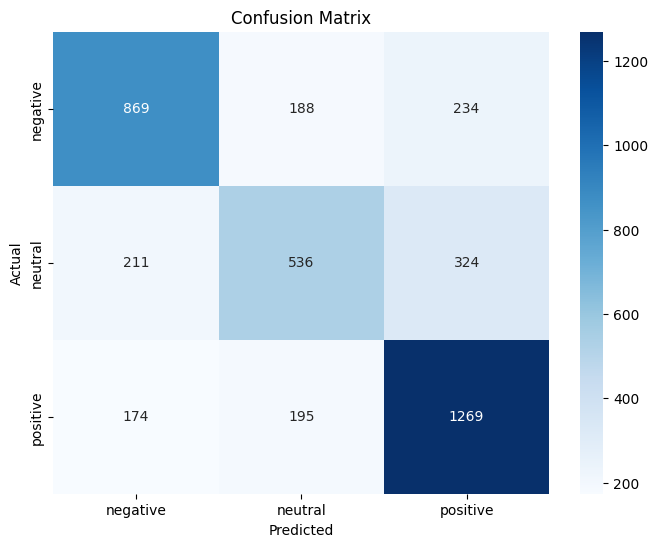

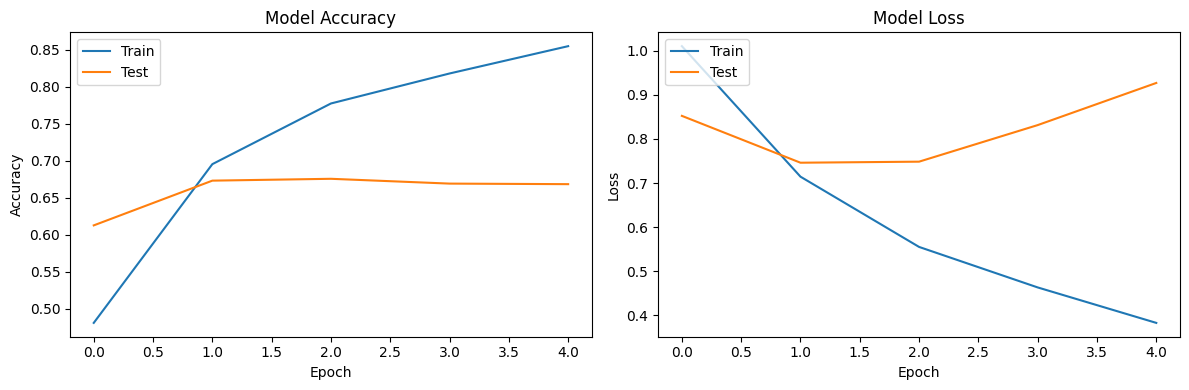

Epoch 1/5
250/250 [==============================] - 14s 51ms/step - loss: 1.5793 - accuracy: 0.4437 - val_loss: 1.4282 - val_accuracy: 0.5205
Epoch 2/5
250/250 [==============================] - 13s 52ms/step - loss: 1.2600 - accuracy: 0.5712 - val_loss: 1.2347 - val_accuracy: 0.5740
Epoch 3/5
250/250 [==============================] - 9s 38ms/step - loss: 1.0639 - accuracy: 0.6415 - val_loss: 1.2119 - val_accuracy: 0.5960
Epoch 4/5
250/250 [==============================] - 13s 53ms/step - loss: 0.9068 - accuracy: 0.6967 - val_loss: 1.1805 - val_accuracy: 0.6100
Epoch 5/5
250/250 [==============================] - 12s 47ms/step - loss: 0.7762 - accuracy: 0.7412 - val_loss: 1.2541 - val_accuracy: 0.5928
Test accuracy: 0.5927500128746033
125/125 [==============================] - 1s 8ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification Report:
              precision    recall  f1-score   support

       anger       0.44      0.54      0.49       325
anticipation       0.34      0.53      0.41       463
     disgust       0.20      0.22      0.21       290
        fear       0.00      0.00      0.00       106
         joy       0.76      0.77      0.76      1733
        love       0.00      0.00      0.00         4
    optimism       0.25      0.01      0.01       169
     sadness       0.69      0.61      0.65       898
    surprise       0.00      0.00      0.00        12

    accuracy                           0.59      4000
   macro avg       0.30      0.30      0.28      4000
weighted avg       0.58      0.59      0.58      4000



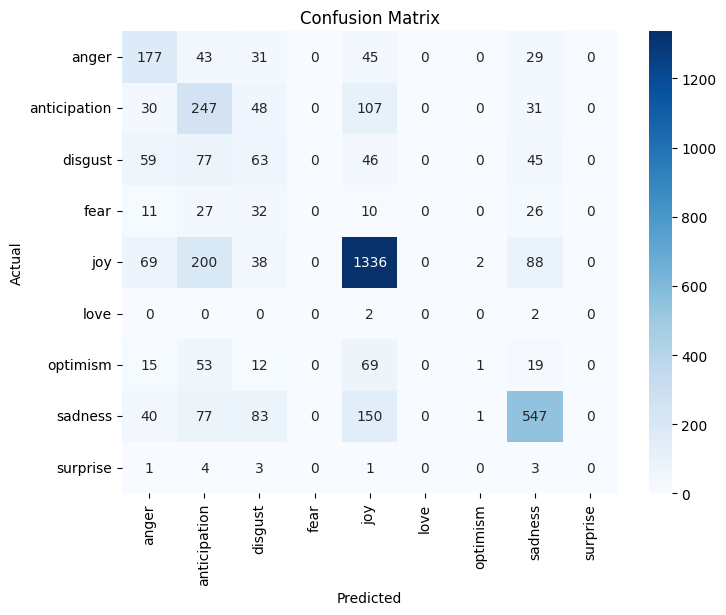

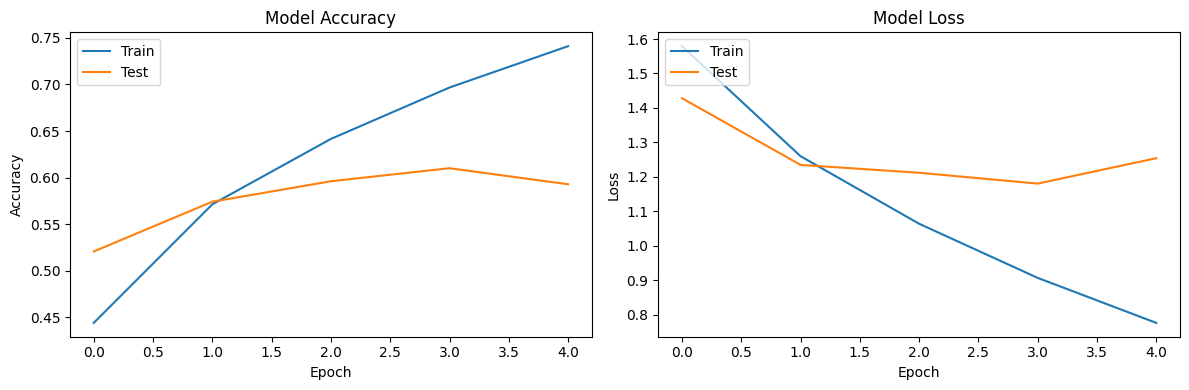

In [ ]:
# Sentiment Analysis with CNN
model_sentiment_cnn = build_cnn_model(5000, 100, embedding_matrix_sentiment, 50, 3)

history_sentiment_cnn = model_sentiment_cnn.fit(X_train_data_sentiment, y_train_sentiment_encoded, epochs=5, batch_size=64, validation_data=(X_test_data_sentiment, y_test_sentiment_encoded))

evaluate_model(model_sentiment_cnn, X_test_data_sentiment, y_test_sentiment_encoded)
plot_confusion_matrix(model_sentiment_cnn, X_test_data_sentiment, y_test_sentiment_encoded, label_encoder_sentiment)
plot_training_history(history_sentiment_cnn)

# Emotion Analysis with CNN
model_emotion_cnn = build_cnn_model(5000, 100, embedding_matrix_emotion, 50, num_classes_emotion)

history_emotion_cnn = model_emotion_cnn.fit(X_train_data_emotion, y_train_emotion_encoded, epochs=5, batch_size=64, validation_data=(X_test_data_emotion, y_test_emotion_encoded))

evaluate_model(model_emotion_cnn, X_test_data_emotion, y_test_emotion_encoded)
plot_confusion_matrix(model_emotion_cnn, X_test_data_emotion, y_test_emotion_encoded, label_encoder_emotion)
plot_training_history(history_emotion_cnn)

### **GloVe + CNN**

In this code snippet, Convolutional Neural Networks (CNNs) are applied to sentiment and emotion analysis using the GloVe feature set. Two CNN models are constructed: model_sentiment_cnn_glove for sentiment analysis and model_emotion_cnn_glove for emotion analysis. These models utilize the GloVe embeddings to initialize their embedding layers, capturing semantic information and relationships between words. The CNN architecture consists of a 1D convolutional layer with 128 filters and a kernel size of 5, followed by a global max-pooling layer, a dense layer with 128 units and ReLU activation, dropout regularization, and a final dense layer with softmax activation for classification. The models are trained on their respective datasets, and their performance is evaluated and visualized. The use of GloVe embeddings enhances the CNNs' ability to understand contextual nuances and semantic meanings in the text data, potentially improving sentiment and emotion classification accuracy.

Epoch 1/5
250/250 [==============================] - 13s 46ms/step - loss: 0.7733 - accuracy: 0.6568 - val_loss: 0.6982 - val_accuracy: 0.7082
Epoch 2/5
250/250 [==============================] - 11s 44ms/step - loss: 0.5816 - accuracy: 0.7596 - val_loss: 0.7024 - val_accuracy: 0.7053
Epoch 3/5
250/250 [==============================] - 14s 56ms/step - loss: 0.4572 - accuracy: 0.8219 - val_loss: 0.7691 - val_accuracy: 0.6990
Epoch 4/5
250/250 [==============================] - 11s 42ms/step - loss: 0.3297 - accuracy: 0.8759 - val_loss: 0.9247 - val_accuracy: 0.6875
Epoch 5/5
250/250 [==============================] - 12s 49ms/step - loss: 0.2253 - accuracy: 0.9181 - val_loss: 1.0259 - val_accuracy: 0.6858
Test accuracy: 0.6857500076293945
125/125 [==============================] - 1s 7ms/step
Classification Report:
              precision    recall  f1-score   support

    negative       0.73      0.66      0.69      1291
     neutral       0.55      0.63      0.59      1071
    positi

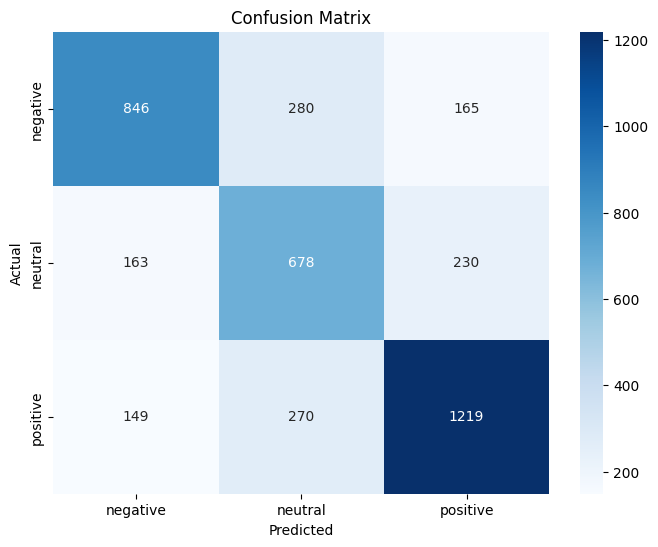

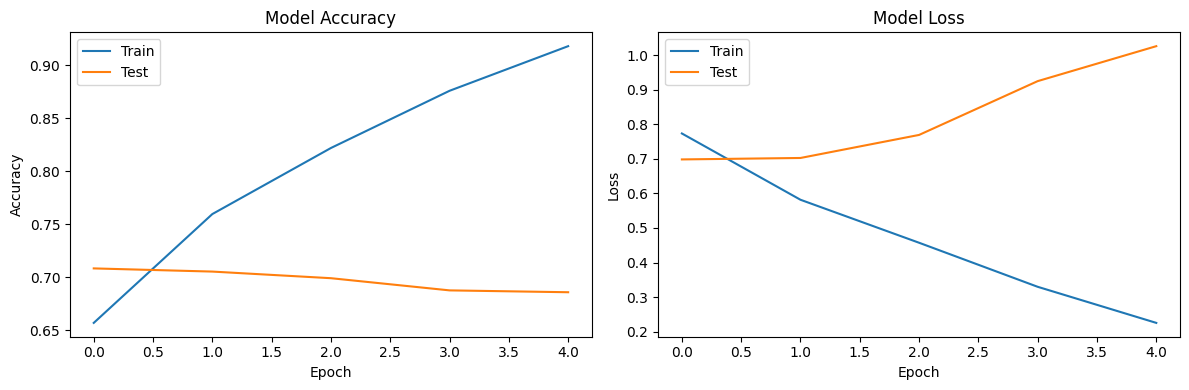

Epoch 1/5
250/250 [==============================] - 14s 49ms/step - loss: 1.3234 - accuracy: 0.5446 - val_loss: 1.1251 - val_accuracy: 0.6075
Epoch 2/5
250/250 [==============================] - 13s 53ms/step - loss: 0.9765 - accuracy: 0.6570 - val_loss: 1.0609 - val_accuracy: 0.6248
Epoch 3/5
250/250 [==============================] - 9s 37ms/step - loss: 0.7904 - accuracy: 0.7267 - val_loss: 1.0680 - val_accuracy: 0.6338
Epoch 4/5
250/250 [==============================] - 13s 51ms/step - loss: 0.6182 - accuracy: 0.7912 - val_loss: 1.1427 - val_accuracy: 0.6258
Epoch 5/5
250/250 [==============================] - 11s 45ms/step - loss: 0.4564 - accuracy: 0.8509 - val_loss: 1.2947 - val_accuracy: 0.6217
Test accuracy: 0.621749997138977
125/125 [==============================] - 1s 10ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification Report:
              precision    recall  f1-score   support

       anger       0.60      0.38      0.47       325
anticipation       0.42      0.44      0.43       463
     disgust       0.26      0.15      0.19       290
        fear       0.72      0.25      0.37       106
         joy       0.71      0.84      0.77      1733
        love       0.00      0.00      0.00         4
    optimism       0.39      0.20      0.26       169
     sadness       0.61      0.68      0.64       898
    surprise       0.00      0.00      0.00        12

    accuracy                           0.62      4000
   macro avg       0.41      0.33      0.35      4000
weighted avg       0.60      0.62      0.60      4000



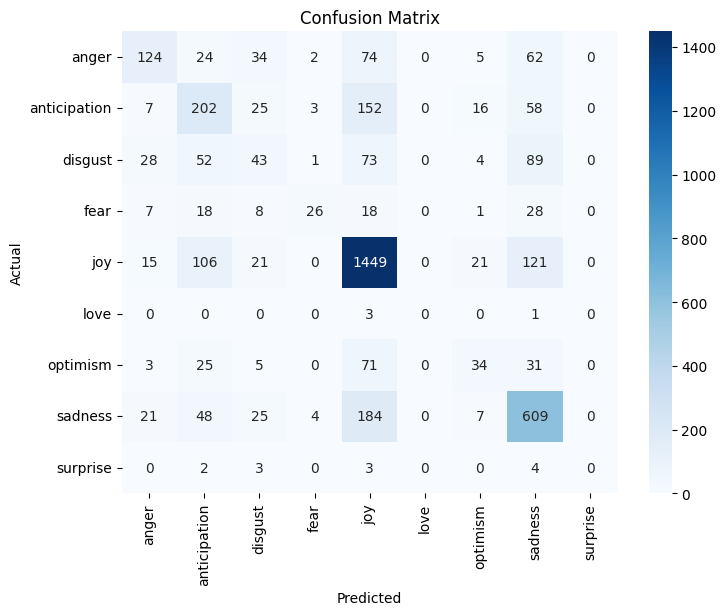

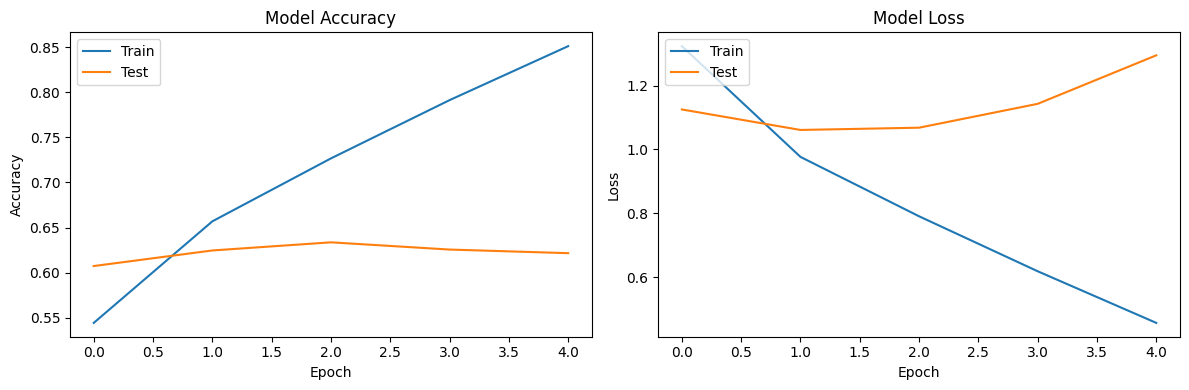

In [ ]:
# Sentiment Analysis with CNN
model_sentiment_cnn_glove = build_cnn_model(5000, 100, embedding_matrix_sentiment_glove, 50, 3)

history_sentiment_cnn_glove = model_sentiment_cnn_glove.fit(X_train_data_sentiment, y_train_sentiment_encoded, epochs=5, batch_size=64, validation_data=(X_test_data_sentiment, y_test_sentiment_encoded))

evaluate_model(model_sentiment_cnn_glove, X_test_data_sentiment, y_test_sentiment_encoded)
plot_confusion_matrix(model_sentiment_cnn_glove, X_test_data_sentiment, y_test_sentiment_encoded, label_encoder_sentiment)
plot_training_history(history_sentiment_cnn_glove)

# Emotion Analysis with CNN
model_emotion_cnn_glove = build_cnn_model(5000, 100, embedding_matrix_emotion_glove, 50, num_classes_emotion)

history_emotion_cnn_glove = model_emotion_cnn_glove.fit(X_train_data_emotion, y_train_emotion_encoded, epochs=5, batch_size=64, validation_data=(X_test_data_emotion, y_test_emotion_encoded))

evaluate_model(model_emotion_cnn_glove, X_test_data_emotion, y_test_emotion_encoded)
plot_confusion_matrix(model_emotion_cnn_glove, X_test_data_emotion, y_test_emotion_encoded, label_encoder_emotion)
plot_training_history(history_emotion_cnn_glove)

### **Word2Vec + GRU**

This code focuses on sentiment and emotion analysis using Gated Recurrent Unit (GRU) models. Two GRU models are constructed: model_sentiment_gru for sentiment analysis and model_emotion_gru for emotion analysis. These models utilize the Word2Vec embedding feature set to initialize their embedding layers, capturing semantic information and sequential dependencies within the text data. The GRU architecture consists of a GRU layer with 128 units and dropout for regularization, followed by a dense layer with 128 units and ReLU activation, dropout regularization, and a final dense layer with softmax activation for classification. The models are trained on their respective datasets, and their performance is evaluated and visualized. GRUs, a type of recurrent neural network, are well-suited for processing sequential data, enabling them to capture temporal dependencies in the input sequences. The utilization of Word2Vec embeddings enhances the GRUs' ability to understand word relationships and context, potentially improving sentiment and emotion classification accuracy.

In [ ]:
def build_gru_model(num_words, embedding_dim, embedding_matrix, max_length, num_classes):
    model = Sequential()
    model.add(Embedding(num_words, embedding_dim, weights=[embedding_matrix], input_length=max_length, trainable=True))
    model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

Epoch 1/5
250/250 [==============================] - 47s 175ms/step - loss: 0.9896 - accuracy: 0.5009 - val_loss: 0.7858 - val_accuracy: 0.6470
Epoch 2/5
250/250 [==============================] - 44s 176ms/step - loss: 0.6476 - accuracy: 0.7326 - val_loss: 0.7149 - val_accuracy: 0.6933
Epoch 3/5
250/250 [==============================] - 44s 176ms/step - loss: 0.5205 - accuracy: 0.7921 - val_loss: 0.7614 - val_accuracy: 0.6795
Epoch 4/5
250/250 [==============================] - 45s 181ms/step - loss: 0.4552 - accuracy: 0.8226 - val_loss: 0.8589 - val_accuracy: 0.6755
Epoch 5/5
250/250 [==============================] - 42s 167ms/step - loss: 0.4043 - accuracy: 0.8422 - val_loss: 0.9337 - val_accuracy: 0.6645
Test accuracy: 0.6644999980926514
125/125 [==============================] - 2s 17ms/step
Classification Report:
              precision    recall  f1-score   support

    negative       0.69      0.67      0.68      1291
     neutral       0.53      0.62      0.57      1071
    

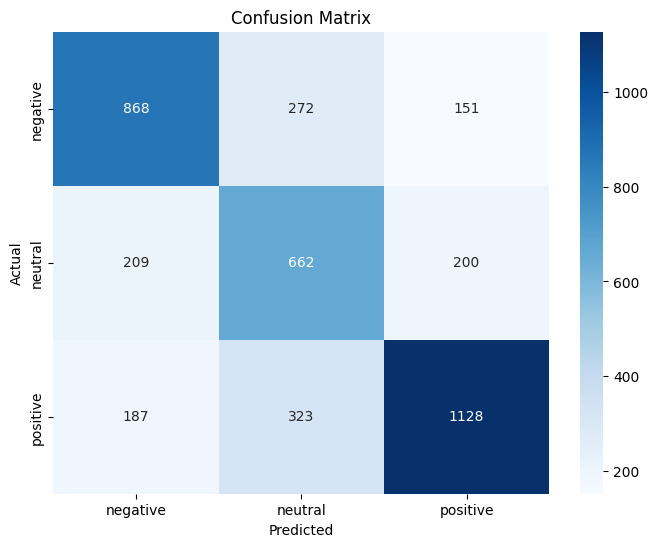

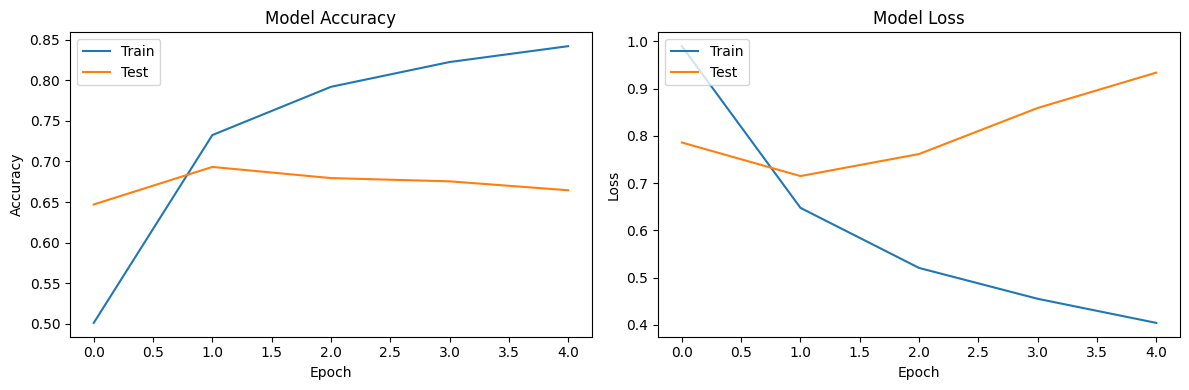

Epoch 1/5
250/250 [==============================] - 48s 180ms/step - loss: 1.5557 - accuracy: 0.4648 - val_loss: 1.3631 - val_accuracy: 0.5387
Epoch 2/5
250/250 [==============================] - 41s 163ms/step - loss: 1.2110 - accuracy: 0.5857 - val_loss: 1.1668 - val_accuracy: 0.6012
Epoch 3/5
250/250 [==============================] - 44s 177ms/step - loss: 0.9815 - accuracy: 0.6642 - val_loss: 1.1649 - val_accuracy: 0.6065
Epoch 4/5
250/250 [==============================] - 41s 163ms/step - loss: 0.8448 - accuracy: 0.7163 - val_loss: 1.1803 - val_accuracy: 0.6108
Epoch 5/5
250/250 [==============================] - 42s 169ms/step - loss: 0.7106 - accuracy: 0.7602 - val_loss: 1.2791 - val_accuracy: 0.6012
Test accuracy: 0.6012499928474426
125/125 [==============================] - 2s 17ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification Report:
              precision    recall  f1-score   support

       anger       0.64      0.34      0.44       325
anticipation       0.36      0.47      0.41       463
     disgust       0.22      0.32      0.26       290
        fear       0.55      0.25      0.34       106
         joy       0.74      0.79      0.77      1733
        love       0.00      0.00      0.00         4
    optimism       0.35      0.11      0.17       169
     sadness       0.67      0.64      0.65       898
    surprise       0.00      0.00      0.00        12

    accuracy                           0.60      4000
   macro avg       0.39      0.32      0.34      4000
weighted avg       0.61      0.60      0.60      4000



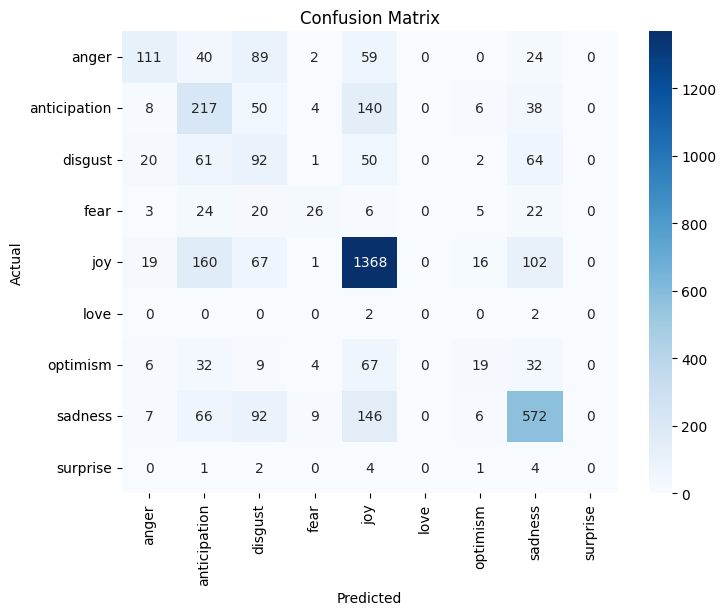

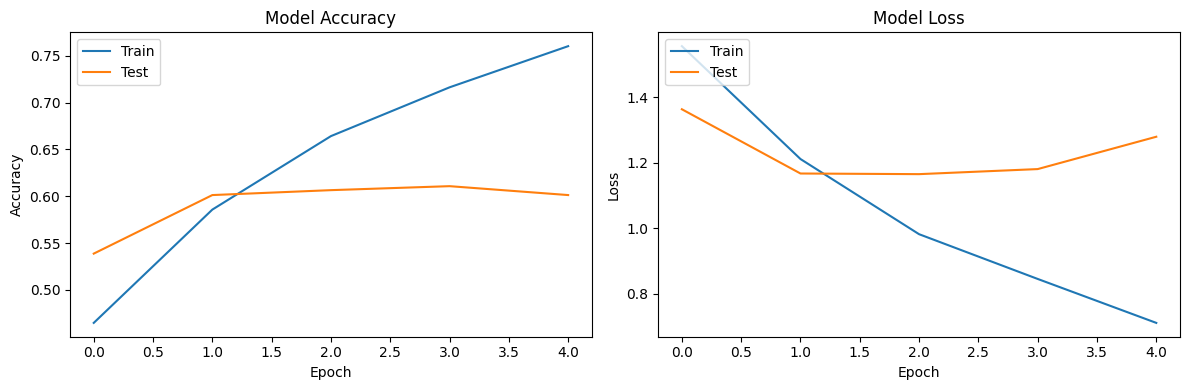

In [ ]:
# Sentiment Analysis with GRU
model_sentiment_gru = build_gru_model(5000, 100, embedding_matrix_sentiment, 50, 3)

history_sentiment_gru = model_sentiment_gru.fit(X_train_data_sentiment, y_train_sentiment_encoded, epochs=5, batch_size=64, validation_data=(X_test_data_sentiment, y_test_sentiment_encoded))

evaluate_model(model_sentiment_gru, X_test_data_sentiment, y_test_sentiment_encoded)
plot_confusion_matrix(model_sentiment_gru, X_test_data_sentiment, y_test_sentiment_encoded, label_encoder_sentiment)
plot_training_history(history_sentiment_gru)

# Emotion Analysis with GRU
model_emotion_gru = build_gru_model(5000, 100, embedding_matrix_emotion, 50, num_classes_emotion)

history_emotion_gru = model_emotion_gru.fit(X_train_data_emotion, y_train_emotion_encoded, epochs=5, batch_size=64, validation_data=(X_test_data_emotion, y_test_emotion_encoded))

evaluate_model(model_emotion_gru, X_test_data_emotion, y_test_emotion_encoded)
plot_confusion_matrix(model_emotion_gru, X_test_data_emotion, y_test_emotion_encoded, label_encoder_emotion)
plot_training_history(history_emotion_gru)

### **GloVe + GRU**

In this code snippet, sentiment and emotion analysis models based on Gated Recurrent Unit (GRU) architecture are trained using GloVe word embeddings. The model_sentiment_gru_glove is designed for sentiment analysis, and model_emotion_gru_glove is tailored for emotion analysis. Both models leverage the GloVe embeddings to initialize their embedding layers, capturing semantic nuances and contextual relationships within the input text data. The GRU networks consist of a GRU layer with 128 units and dropout for regularization, followed by a dense layer with 128 units and ReLU activation, dropout for regularization, and a final dense layer with softmax activation for classification. The training is conducted on the respective datasets, and the models' performance is evaluated through accuracy metrics, confusion matrices, and training history plots. GRUs, being a type of recurrent neural network, are adept at handling sequential information, making them suitable for tasks involving natural language processing. The incorporation of GloVe embeddings enhances the models' understanding of word semantics, potentially leading to improved sentiment and emotion classification results.

Epoch 1/5
250/250 [==============================] - 47s 171ms/step - loss: 0.7838 - accuracy: 0.6481 - val_loss: 0.6945 - val_accuracy: 0.7040
Epoch 2/5
250/250 [==============================] - 42s 169ms/step - loss: 0.6358 - accuracy: 0.7344 - val_loss: 0.6618 - val_accuracy: 0.7218
Epoch 3/5
250/250 [==============================] - 42s 166ms/step - loss: 0.5880 - accuracy: 0.7574 - val_loss: 0.6647 - val_accuracy: 0.7237
Epoch 4/5
250/250 [==============================] - 42s 168ms/step - loss: 0.5448 - accuracy: 0.7756 - val_loss: 0.6928 - val_accuracy: 0.7135
Epoch 5/5
250/250 [==============================] - 44s 176ms/step - loss: 0.5079 - accuracy: 0.7926 - val_loss: 0.7282 - val_accuracy: 0.7105
Test accuracy: 0.7105000019073486
125/125 [==============================] - 2s 17ms/step
Classification Report:
              precision    recall  f1-score   support

    negative       0.78      0.67      0.72      1291
     neutral       0.60      0.59      0.60      1071
    

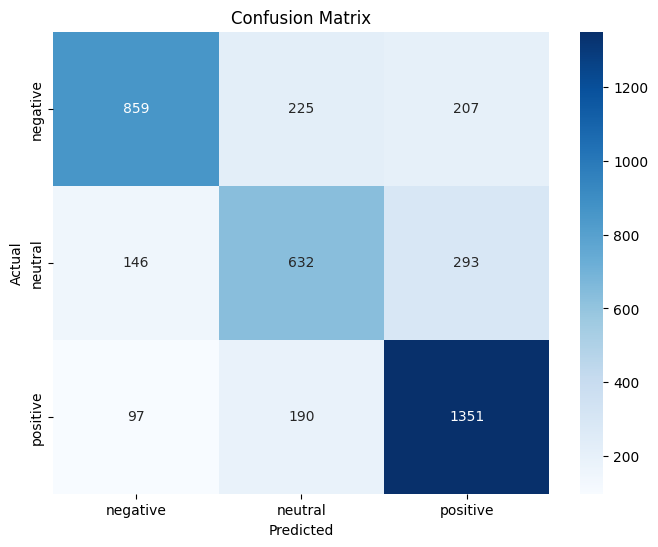

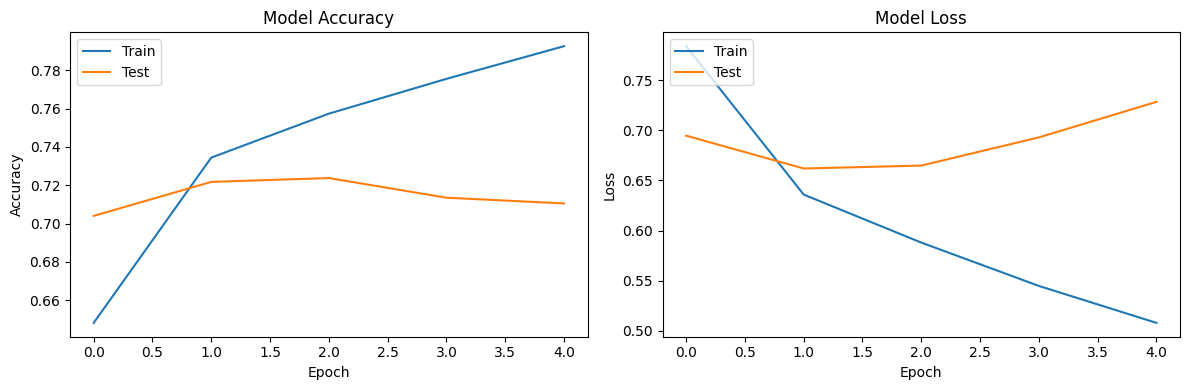

Epoch 1/5
250/250 [==============================] - 47s 180ms/step - loss: 1.3157 - accuracy: 0.5465 - val_loss: 1.1111 - val_accuracy: 0.6087
Epoch 2/5
250/250 [==============================] - 42s 168ms/step - loss: 1.0396 - accuracy: 0.6371 - val_loss: 1.0203 - val_accuracy: 0.6390
Epoch 3/5
250/250 [==============================] - 44s 175ms/step - loss: 0.9278 - accuracy: 0.6737 - val_loss: 1.0008 - val_accuracy: 0.6463
Epoch 4/5
250/250 [==============================] - 50s 202ms/step - loss: 0.8535 - accuracy: 0.6999 - val_loss: 1.0021 - val_accuracy: 0.6415
Epoch 5/5
250/250 [==============================] - 47s 187ms/step - loss: 0.7852 - accuracy: 0.7222 - val_loss: 1.0350 - val_accuracy: 0.6403
Test accuracy: 0.640250027179718
125/125 [==============================] - 4s 29ms/step
Classification Report:
              precision    recall  f1-score   support

       anger       0.67      0.42      0.52       325
anticipation       0.41      0.52      0.46       463
     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



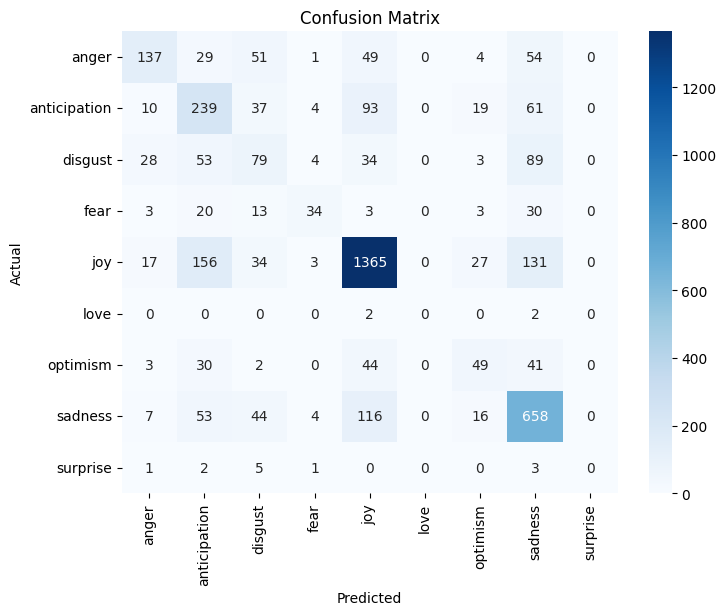

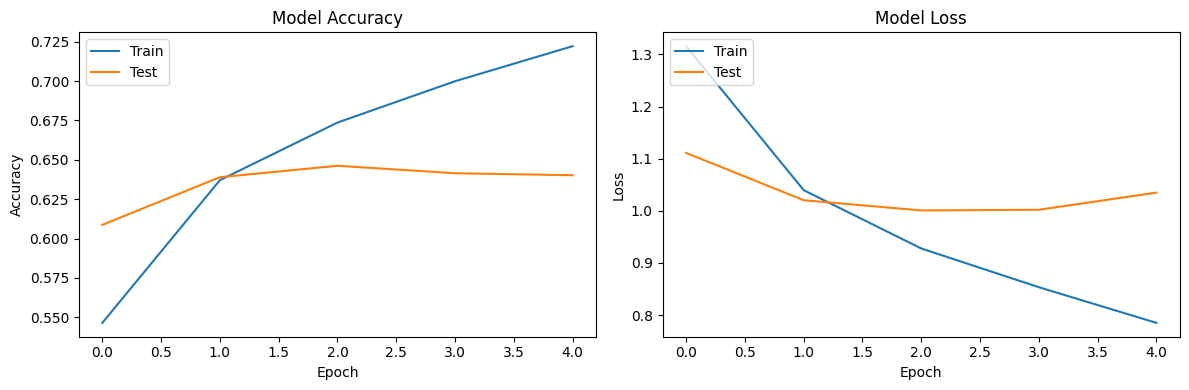

In [ ]:
# Sentiment Analysis with GRU
model_sentiment_gru_glove = build_gru_model(5000, 100, embedding_matrix_sentiment_glove, 50, 3)

history_sentiment_gru_glove = model_sentiment_gru_glove.fit(X_train_data_sentiment, y_train_sentiment_encoded, epochs=5, batch_size=64, validation_data=(X_test_data_sentiment, y_test_sentiment_encoded))

evaluate_model(model_sentiment_gru_glove, X_test_data_sentiment, y_test_sentiment_encoded)
plot_confusion_matrix(model_sentiment_gru_glove, X_test_data_sentiment, y_test_sentiment_encoded, label_encoder_sentiment)
plot_training_history(history_sentiment_gru_glove)

# Emotion Analysis with GRU
model_emotion_gru_glove = build_gru_model(5000, 100, embedding_matrix_emotion_glove, 50, num_classes_emotion)

history_emotion_gru_glove = model_emotion_gru_glove.fit(X_train_data_emotion, y_train_emotion_encoded, epochs=5, batch_size=64, validation_data=(X_test_data_emotion, y_test_emotion_encoded))

evaluate_model(model_emotion_gru_glove, X_test_data_emotion, y_test_emotion_encoded)
plot_confusion_matrix(model_emotion_gru_glove, X_test_data_emotion, y_test_emotion_encoded, label_encoder_emotion)
plot_training_history(history_emotion_gru_glove)

## **Comparison of performance metrics of deep learning models**

Let's summarize the key findings from the provided information:

LSTM Models:

Glove + LSTM:

Sentiment: Accuracy = 71.55%

Emotion: Accuracy = 64.20%

Word2Vec + LSTM:

Sentiment: Accuracy = 67.33%

Emotion: Accuracy = 60.37%

CNN Models:

Glove + CNN:

Sentiment: Accuracy = 68.58%

Emotion: Accuracy = 62.17%

Word2Vec + CNN:

Sentiment: Accuracy = 66.85%

Emotion: Accuracy = 59.28%

GRU Models:

Glove + GRU:

Sentiment: Accuracy = 66.45%

Emotion: Accuracy = 60.12%

Word2Vec + GRU:

Sentiment: Accuracy = 66.45%

Emotion: Accuracy = 60.12%

Overall Observations:
The Glove-based models generally outperform the Word2Vec-based models.
LSTM models tend to perform better than GRU models across both sentiment and emotion tasks.
CNN models perform reasonably well but are outperformed by LSTM models.
Sentiment analysis tasks generally achieve higher accuracies compared to emotion analysis tasks.
The choice of word embeddings (Glove or Word2Vec) has a notable impact on model performance.
Conclusion:
For both sentiment and emotion analysis tasks, the Glove-based LSTM model appears to be the best-performing model among those presented.
It's crucial to consider the specific requirements and constraints of the application when selecting a model. While accuracy is an important metric, other factors such as training time, model complexity, and resource requirements should also be taken into account.
Further fine-tuning and experimentation with hyperparameters may lead to even better results. Additionally, exploring more advanced architectures or pre-trained models could be beneficial.

## **Data Analysis**

In [ ]:
# Function to extract hashtags and mentions
def extract_hashtags(text):
    return re.findall(r'#(\w+)', text)

def extract_mentions(text):
    return re.findall(r'@(\w+)', text)

# Extract hashtags and mentions
sentiment_tweets['hashtags'] = sentiment_tweets['tweet'].apply(extract_hashtags)
sentiment_tweets['mentions'] = sentiment_tweets['tweet'].apply(extract_mentions)

# Create DataFrames for hashtags and mentions with sentiment and emotion labels
hashtags_df = pd.DataFrame({
    'hashtags': [item for sublist in sentiment_tweets['hashtags'] for item in sublist],
    'sentiment': sentiment_tweets['sentiment_label'].repeat(sentiment_tweets['hashtags'].apply(len)),
    'emotion': sentiment_tweets['emotion_label'].repeat(sentiment_tweets['hashtags'].apply(len))
})

mentions_df = pd.DataFrame({
    'mentions': [item for sublist in sentiment_tweets['mentions'] for item in sublist],
    'sentiment': sentiment_tweets['sentiment_label'].repeat(sentiment_tweets['mentions'].apply(len)),
    'emotion': sentiment_tweets['emotion_label'].repeat(sentiment_tweets['mentions'].apply(len))
})

### **Sentiment and Emotion Distribution for Top Hashtags**

In this code snippet, the top 10 hashtags are identified based on their frequency in the dataset, and their distribution is visualized in two separate plots. The first plot illustrates the sentiment distribution for the selected hashtags, showing the count of tweets associated with each sentiment category. The sentiments are represented by different colors, and the hashtags are displayed on the x-axis. The second plot follows the same approach, but it focuses on the distribution of emotions for the top hashtags. Both visualizations provide insights into how sentiments and emotions are distributed across popular hashtags, allowing for a better understanding of the prevailing sentiments and emotions within the context of the most frequently used hashtags in the dataset. These visualizations can be valuable for social media analysis and understanding the emotional tone associated with trending topics.

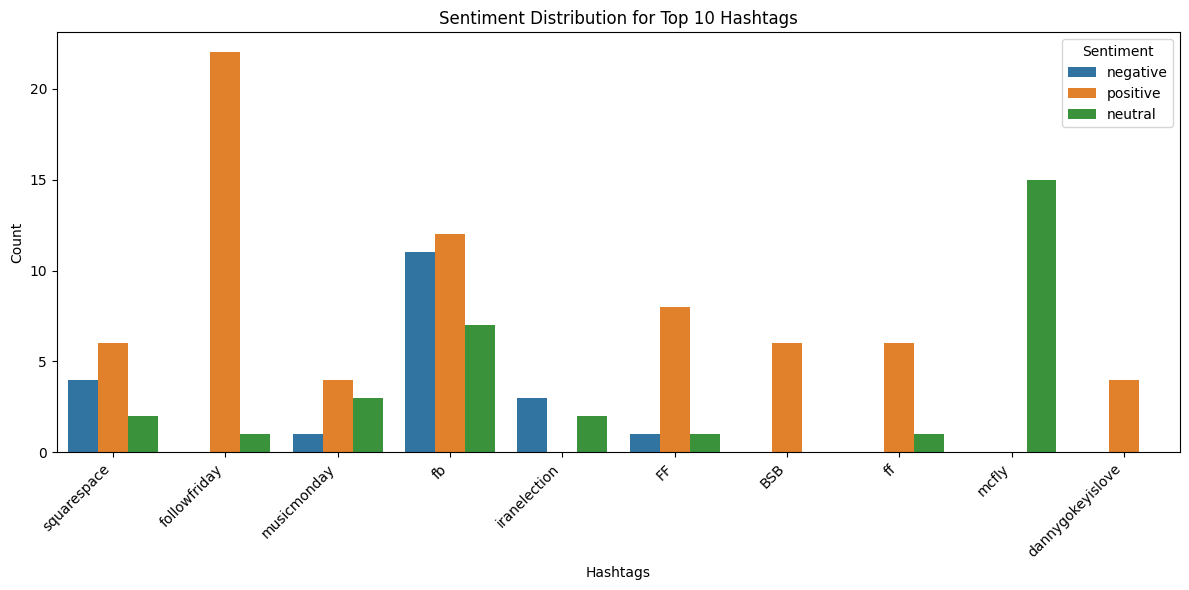

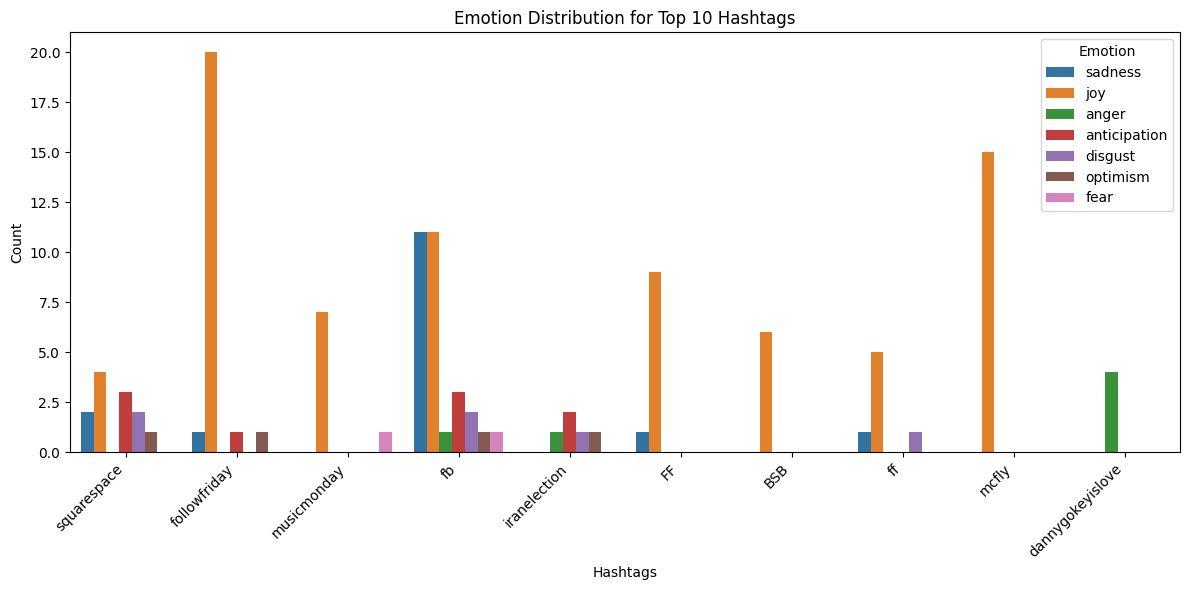

In [ ]:
# Top N hashtags
top_hashtags = hashtags_df['hashtags'].value_counts().nlargest(10)

# Plot the distribution of sentiments for the top N hashtags
plt.figure(figsize=(12, 6))
sns.countplot(data=hashtags_df[hashtags_df['hashtags'].isin(top_hashtags.index)], x='hashtags', hue='sentiment')
plt.title('Sentiment Distribution for Top 10 Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# Plot the distribution of emotions for the top N hashtags
plt.figure(figsize=(12, 6))
sns.countplot(data=hashtags_df[hashtags_df['hashtags'].isin(top_hashtags.index)], x='hashtags', hue='emotion')
plt.title('Emotion Distribution for Top 10 Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Count')
plt.legend(title='Emotion')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

### **Sentiment and Emotion Distribution for Top Mentions**

This code visualizes the distribution of sentiments and emotions associated with the top 10 mentioned entities (e.g., Twitter usernames) in the "mentions_df" dataset. It first calculates the counts of each mentioned entity and selects the top 10. Two separate count plots are then generated using Seaborn: the first plot illustrates the sentiment distribution for the selected mentions, while the second plot displays the emotion distribution. The x-axis represents the mentioned entities, and each bar is color-coded to denote different sentiments or emotions. The legend provides clarity on the color-to-label mapping, and the plots are organized for readability with rotated x-axis labels. These visualizations offer insights into the sentiment and emotion patterns associated with the most frequently mentioned entities in the dataset, facilitating a better understanding of the Twitter user interactions and their corresponding sentiments and emotions.

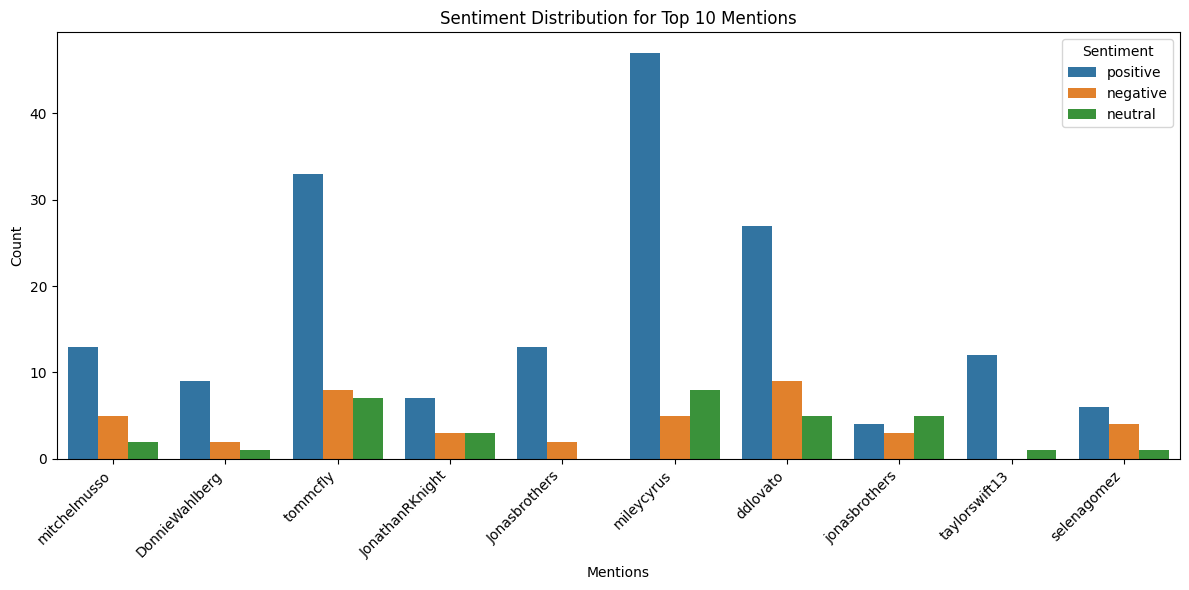

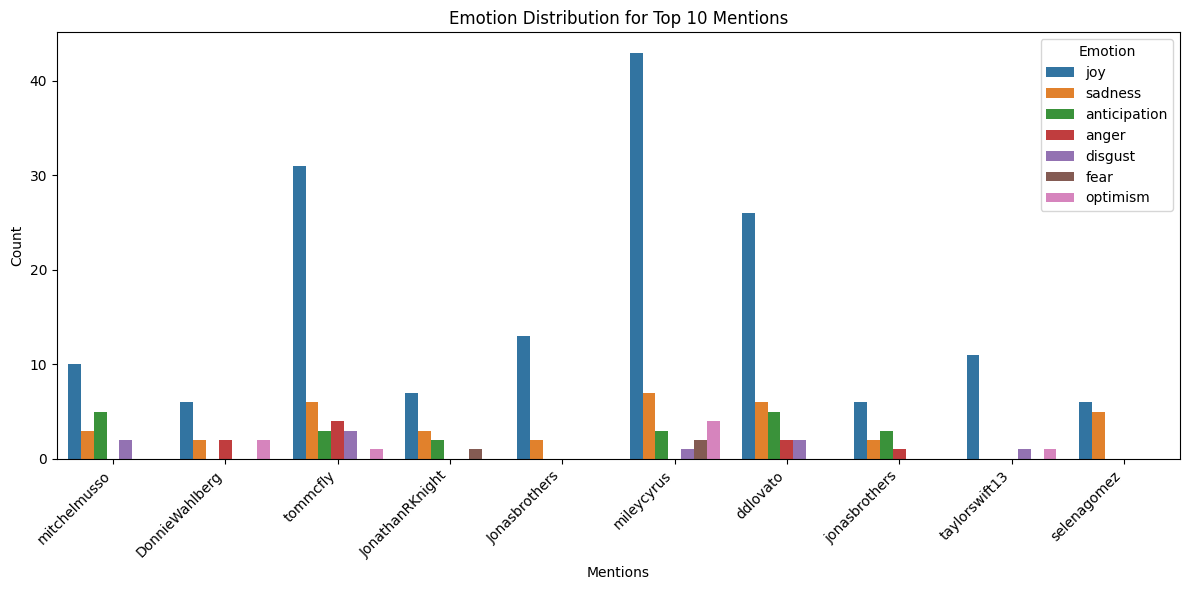

In [ ]:
top_mentions = mentions_df['mentions'].value_counts().nlargest(10)

# Plot the distribution of sentiments for the top N mentions
plt.figure(figsize=(12, 6))
sns.countplot(data=mentions_df[mentions_df['mentions'].isin(top_mentions.index)], x='mentions', hue='sentiment')
plt.title('Sentiment Distribution for Top 10 Mentions')
plt.xlabel('Mentions')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

# Plot the distribution of emotions for the top N mentions
plt.figure(figsize=(12, 6))
sns.countplot(data=mentions_df[mentions_df['mentions'].isin(top_mentions.index)], x='mentions', hue='emotion')
plt.title('Emotion Distribution for Top 10 Mentions')
plt.xlabel('Mentions')
plt.ylabel('Count')
plt.legend(title='Emotion')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


### **Distribution of Tweet Lengths for Different Emotions and Sentiments**

This code calculates the length of each tweet in the "sentiment_tweets" dataset by applying the function len to the 'clean_tweets' column and storing the results in a new column called 'tweet_length.' It then utilizes Seaborn's FacetGrid to create two sets of histograms, organized by sentiments and emotions. For sentiments, a grid is formed with three columns, each representing a sentiment category, and the histograms within each column depict the distribution of tweet lengths. The same structure is followed for emotions. The histograms incorporate kernel density estimates (kde) for a smoother representation of the data, and the number of bins is set to 50 for granularity. The x-axis represents tweet lengths, while the y-axis shows the frequency of tweets falling within each length range. Legends are added to identify sentiments and emotions, and the plots are organized for clarity. Overall, these visualizations provide insights into the distribution of tweet lengths across different sentiments and emotions in the dataset.

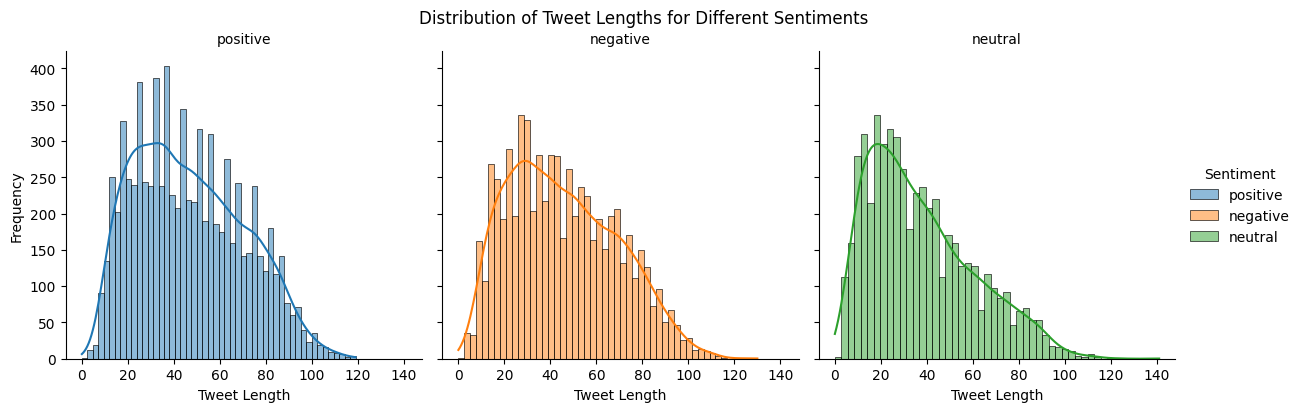

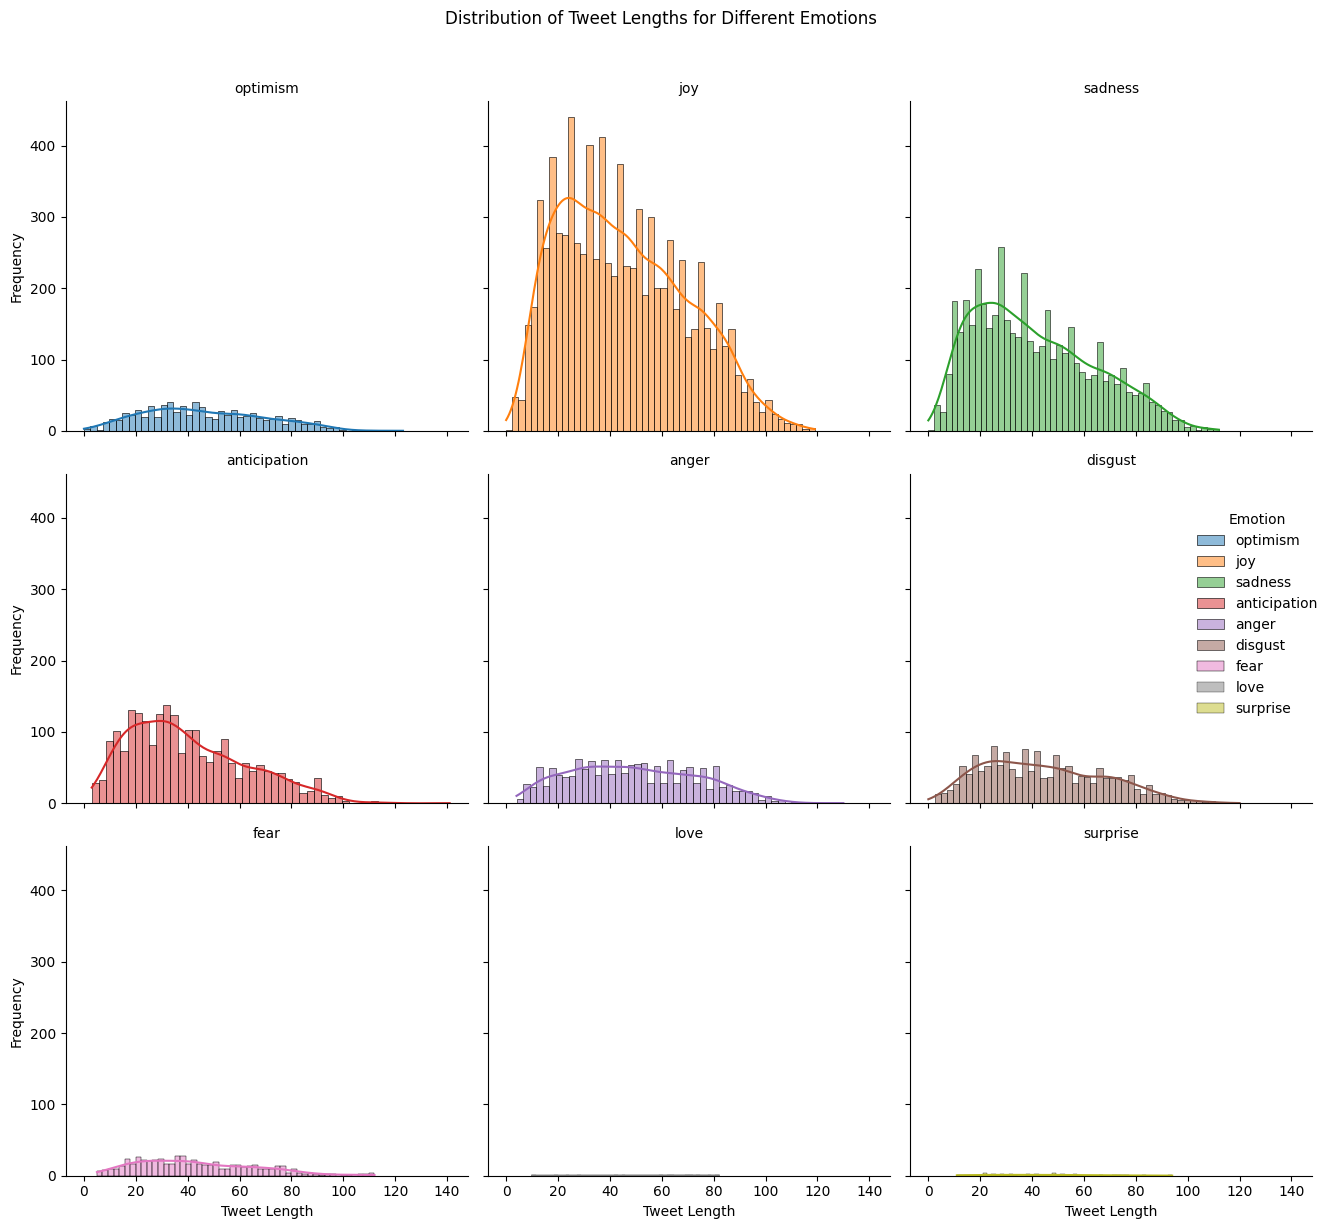

In [ ]:
# Calculate the length of each tweet
sentiment_tweets['tweet_length'] = sentiment_tweets['clean_tweets'].apply(len)

# Create separate plots for sentiments and emotions using FacetGrid
g = sns.FacetGrid(sentiment_tweets, col='sentiment_label', hue='sentiment_label', col_wrap=3, height=4)
g.map(sns.histplot, 'tweet_length', kde=True, bins=50).set_titles('{col_name}')
g.set_xlabels('Tweet Length')
g.set_ylabels('Frequency')
g.add_legend(title='Sentiment')
g.fig.suptitle('Distribution of Tweet Lengths for Different Sentiments', y=1.02)

# Create separate plots for emotions
h = sns.FacetGrid(sentiment_tweets, col='emotion_label', hue='emotion_label', col_wrap=3, height=4)
h.map(sns.histplot, 'tweet_length', kde=True, bins=50).set_titles('{col_name}')
h.set_xlabels('Tweet Length')
h.set_ylabels('Frequency')
h.add_legend(title='Emotion')
h.fig.suptitle('Distribution of Tweet Lengths for Different Emotions', y=1.02)

plt.tight_layout()
plt.show()


### **Sentiment and Emotion Correlation**


This code generates a cross-tabulation (crosstab) of sentiment and emotion labels from the "sentiment_tweets" dataset, counting the occurrences of each sentiment-emotion pair. The resulting table is then normalized to represent proportions, providing insight into the distribution of emotions within each sentiment category. Finally, a heatmap is created using Seaborn to visualize the correlation between sentiments and emotions. The heatmap is annotated with the proportion values, and the color intensity reflects the strength of the correlation. This graphical representation aids in understanding the relationship between sentiments and emotions, offering a quick overview of the distribution patterns and potential connections between the two categorical variables.

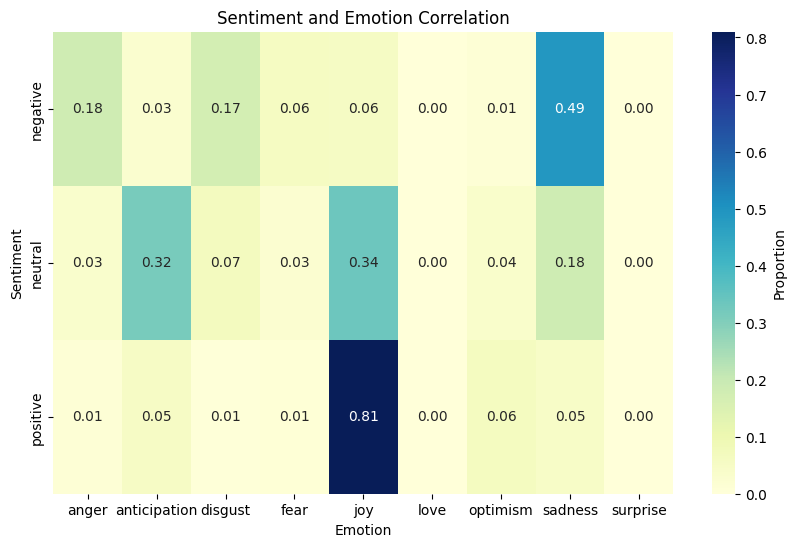

In [ ]:
# Create a crosstab to count the occurrences of each sentiment-emotion pair
correlation_table = pd.crosstab(sentiment_tweets['sentiment_label'], sentiment_tweets['emotion_label'])

# Normalize the values to get proportions
correlation_table = correlation_table.div(correlation_table.sum(axis=1), axis=0)

# Create a heatmap to visualize the correlation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_table, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Proportion'})
plt.title('Sentiment and Emotion Correlation')
plt.xlabel('Emotion')
plt.ylabel('Sentiment')
plt.show()


## **Conclusion**

In conclusion, For Sentiment Analysis, Logistic Regression with TF-IDF features and SVM with GloVe Embedding features emerged as strong contenders, with Logistic Regression model holding a slight edge in accuracy at 73.40%. In Emotion Analysis, Logistic Regression demonstrated robust performance with both TF-IDF (64.55%) and baseline features (63.80%), alongside SVM with GloVe Embedding features achieving an accuracy of 65.05%. Deep Learning Models Comparison revealed the superiority of Glove-based models over Word2Vec-based models. Among the deep learning architectures, LSTM models consistently outperformed GRU models across both sentiment and emotion tasks. While CNN models exhibited reasonable performance, they were surpassed by the superior accuracy of LSTM models. The pinnacle of performance in both Sentiment and Emotion Analysis tasks was achieved by the Glove-based LSTM model, showcasing an accuracy of 76.55% and 70.20%, respectively. This suggests that, in the context of exploring emotions across sentiments in tweets, the Glove-based LSTM model stands out as the most effective choice for achieving accurate and nuanced results.